In [1]:
import matplotlib.pyplot as plt
import optuna
import pandas as pd
import numpy as np
import rdkit.Chem
from rdkit.Chem import AllChem
import seaborn as sns
sns.set()
optuna.logging.disable_default_handler()

In [2]:
train_data="../data/train_data_size_smiles_rem_z_average_cutoff_500_dispersity_cutoff_0.3_cutoff_size_disp_300_cutoff_group_size_3_cutoff_min_conc_3_valid_threshold_0.2_valid_threshold_0.2.csv"
test_data ="../data/train_data_size_removed_smiles_z_average_cutoff_500_dispersity_cutoff_0.3_cutoff_size_disp_300_cutoff_group_size_3_cutoff_min_conc_3_valid_threshold_0.2_valid_threshold_0.2.csv"

smiles_col = "circular_smiles_10"
fingerprint_radius=6
fingerprint_bits=2048
test_size=0.2
random_state=342

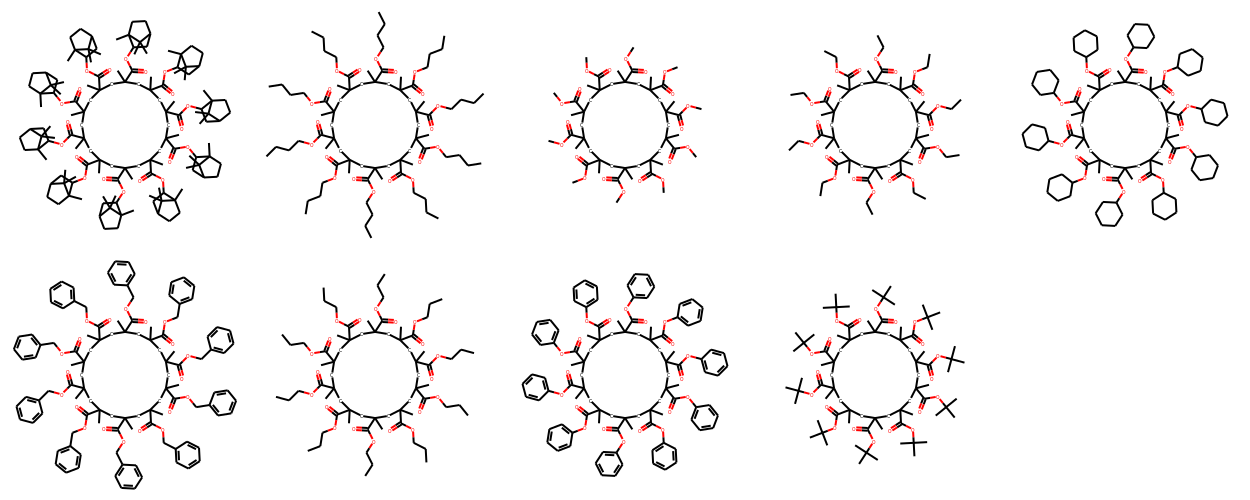

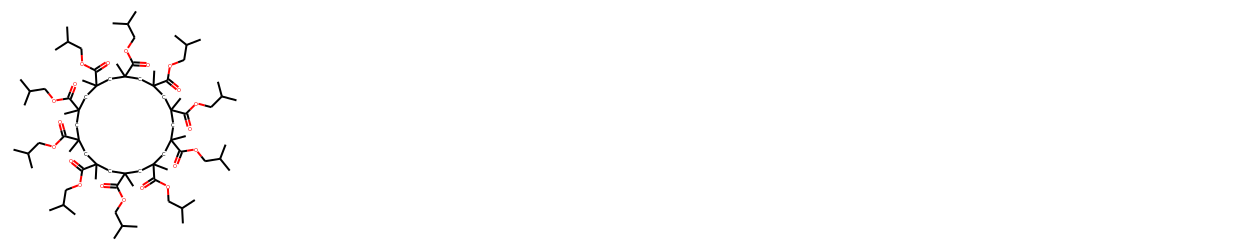

In [11]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

all_smiles = list(train_df["circular_smiles_10"].unique())
display(rdkit.Chem.Draw.MolsToGridImage([rdkit.Chem.MolFromSmiles(smiles) for smiles in list(train_df["circular_smiles_10"].unique())],molsPerRow=5,subImgSize=(250,250)))

all_smiles.extend(list(test_df["circular_smiles_10"].unique()))
mols={smiles:rdkit.Chem.MolFromSmiles(smiles) for smiles in all_smiles}
display(rdkit.Chem.Draw.MolsToGridImage([rdkit.Chem.MolFromSmiles(smiles) for smiles in list(test_df["circular_smiles_10"].unique())],molsPerRow=5,subImgSize=(250,250)))


train_df["mol"] = train_df[smiles_col].apply(lambda smiles: mols[smiles])
test_df["mol"] = test_df[smiles_col].apply(lambda smiles: mols[smiles])


In [14]:
fingerprints={ smiles:AllChem.GetMorganFingerprintAsBitVect(mols[smiles], radius=fingerprint_radius,nBits=fingerprint_bits) for smiles in all_smiles}
train_df["fingerprint"] = train_df[smiles_col].apply(lambda smiles: fingerprints[smiles])
test_df["fingerprint"] = test_df[smiles_col].apply(lambda smiles: fingerprints[smiles])

In [15]:
np_fingerprints={smiles:np.array(fingerprints[smiles]) for smiles in fingerprints}
fp_sum = np.sum([fp for fp in np_fingerprints.values()],axis=0)
fp_sum[fp_sum>0]=1
print(fp_sum.sum())
#for i,v in enumerate(list(list(np_fingerprints.values())[0])):
#    if v > 0:
#        pass
        #print(i,v)

220


In [305]:
#for smiles,mol in mols.items():
#    display(smiles)
#    display(mol)

1


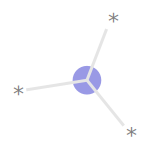

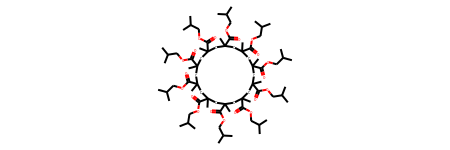

2


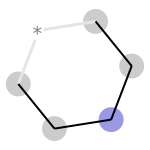

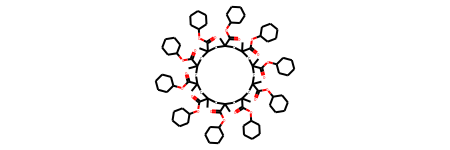

13


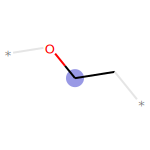

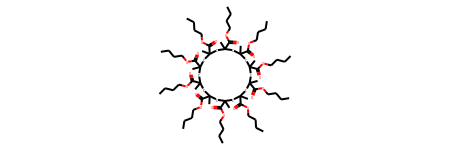

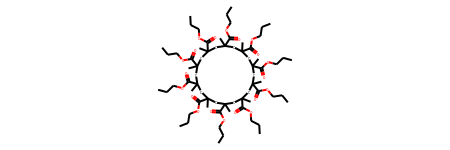

32


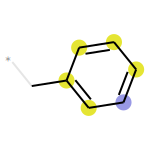

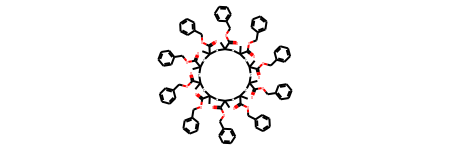

50


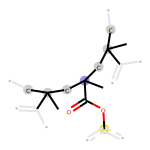

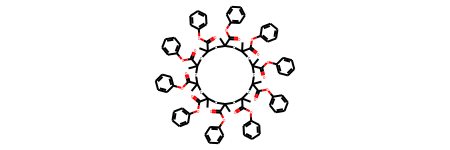

74


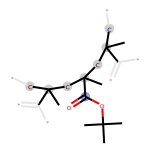

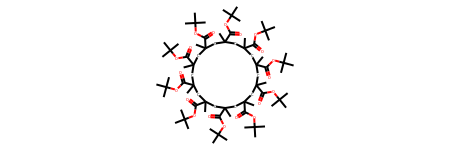

80


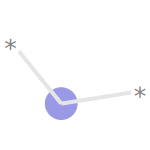

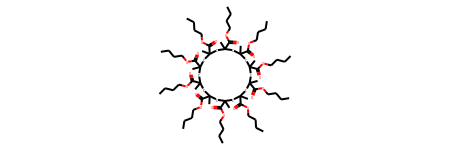

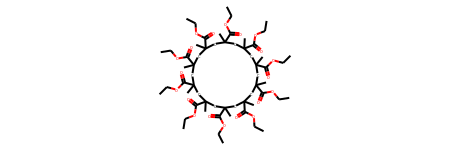

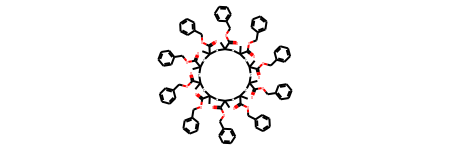

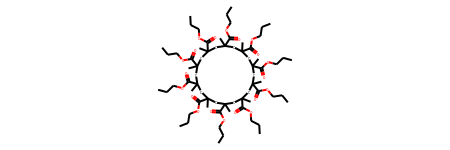

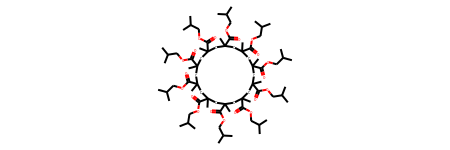

101


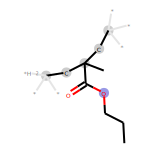

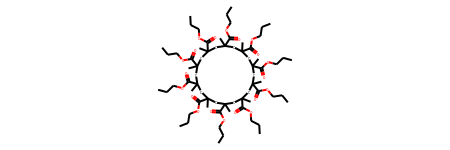

114


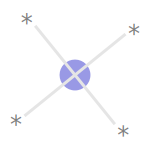

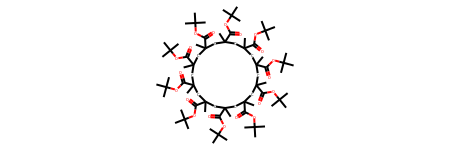

118


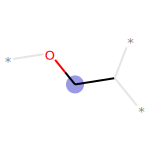

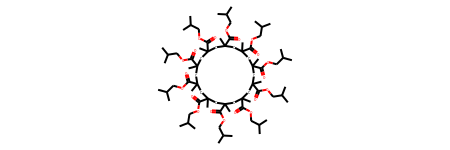

119


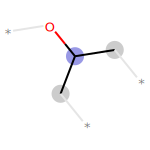

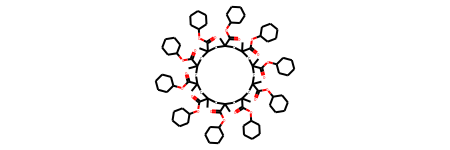

136


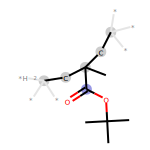

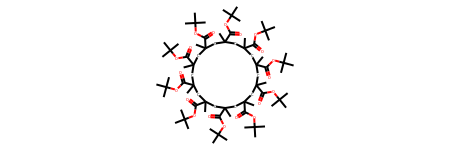

139


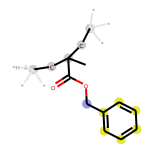

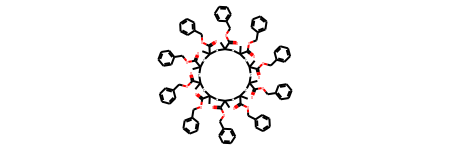

142


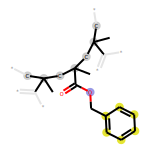

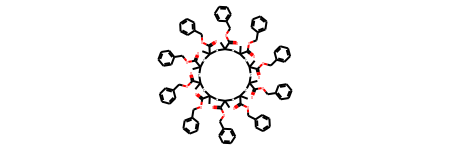

147


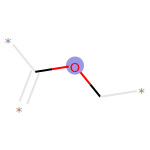

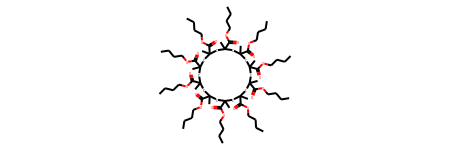

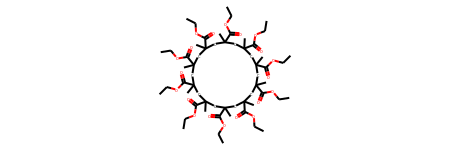

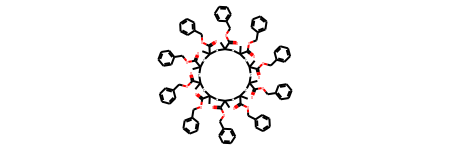

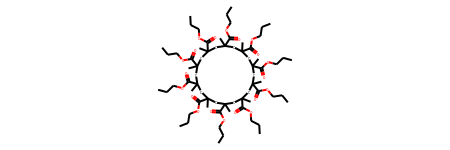

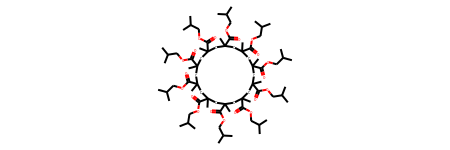

158


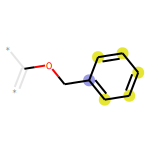

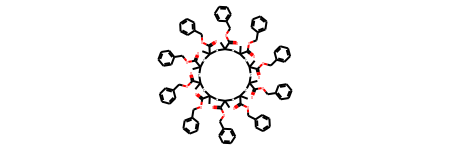

167


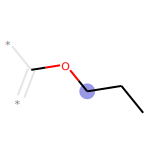

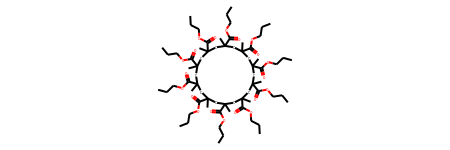

186


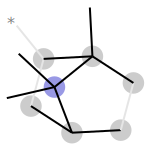

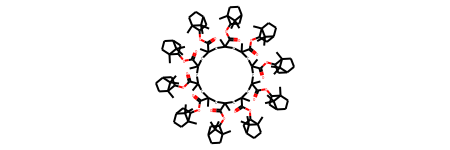

190


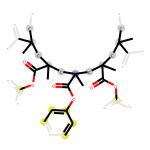

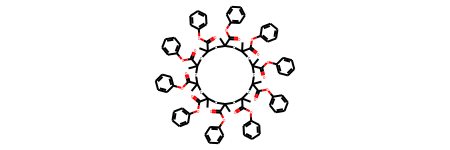

206


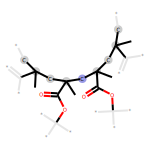

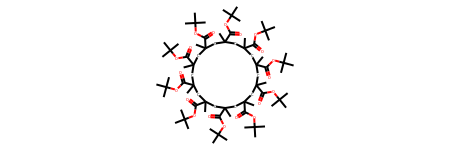

231


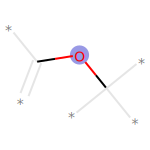

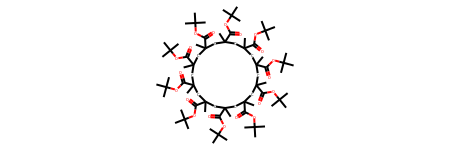

235


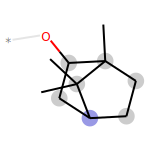

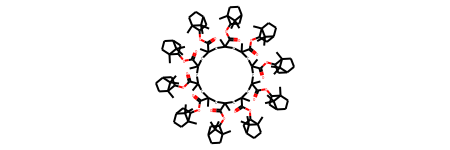

249


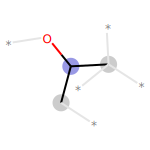

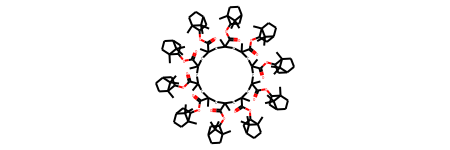

254


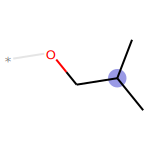

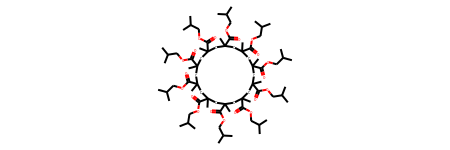

256


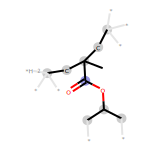

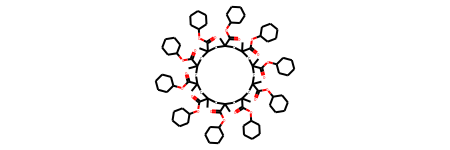

269


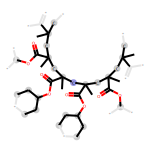

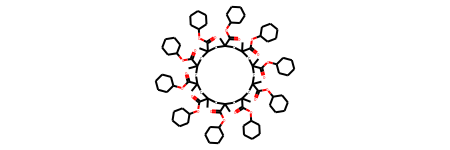

283


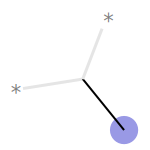

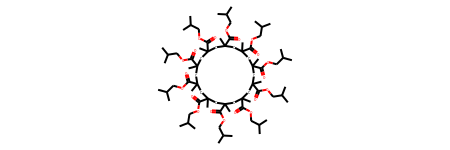

294


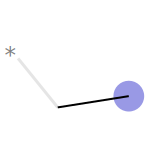

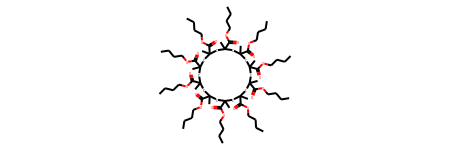

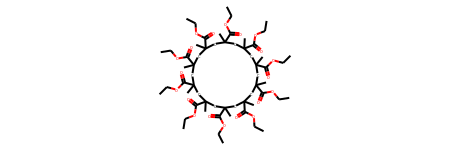

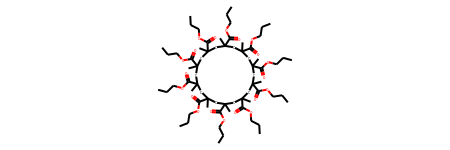

305


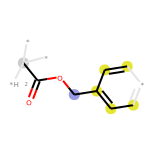

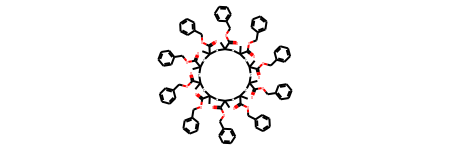

306


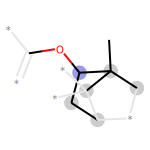

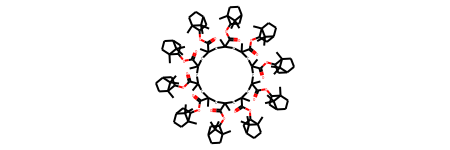

316


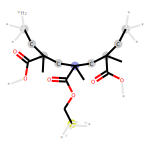

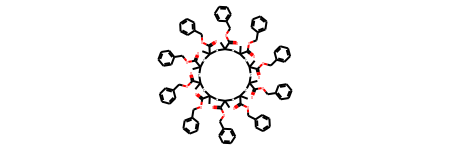

322


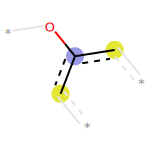

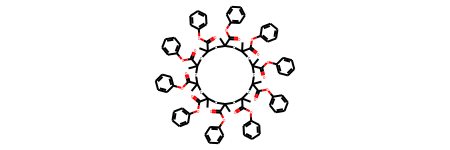

333


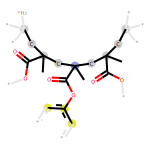

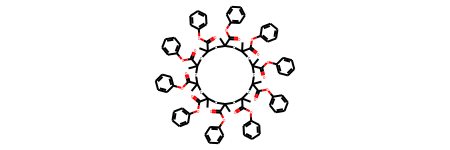

367


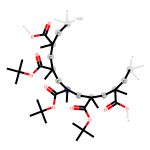

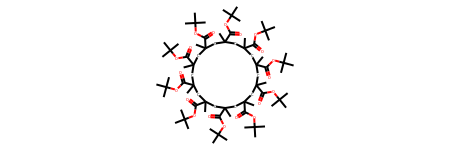

389


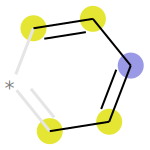

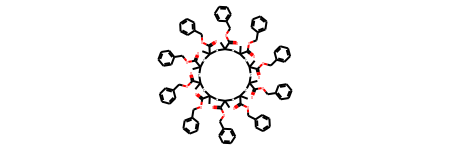

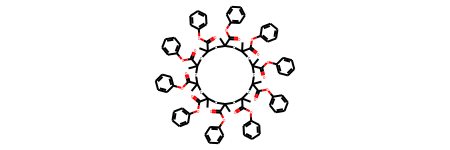

392


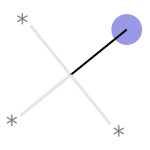

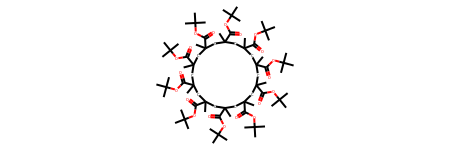

394


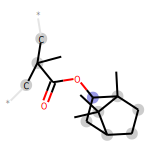

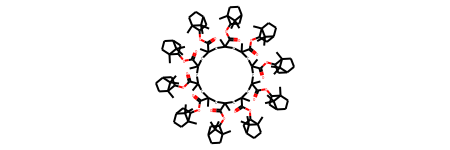

399


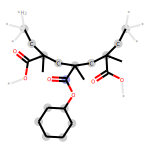

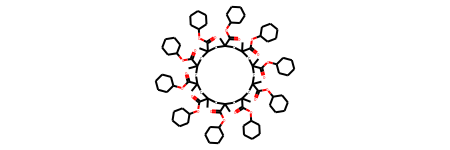

401


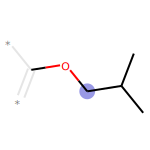

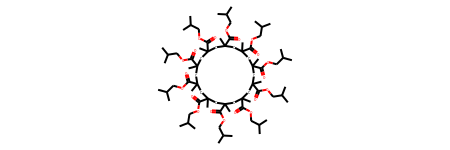

403


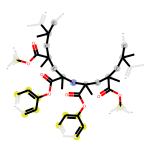

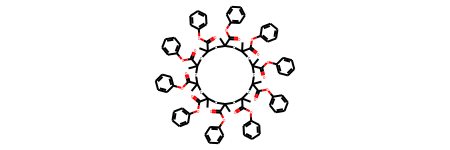

407


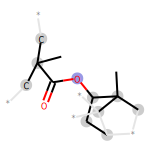

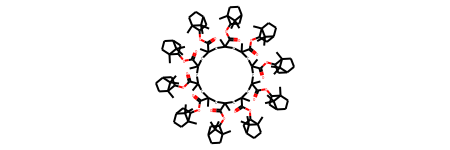

451


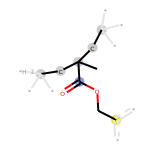

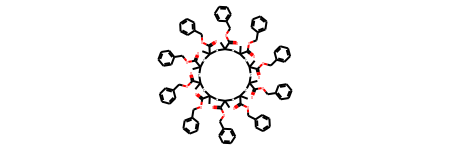

457


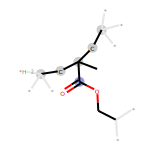

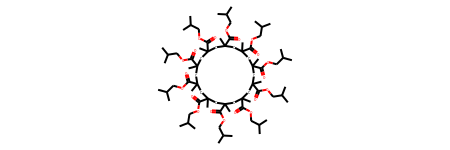

464


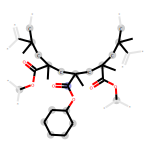

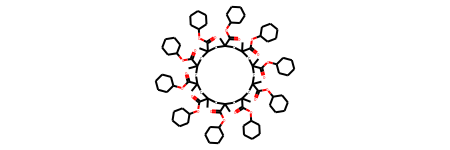

477


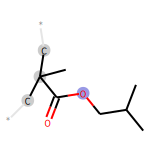

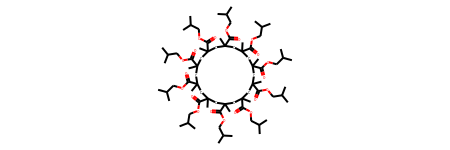

492


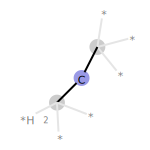

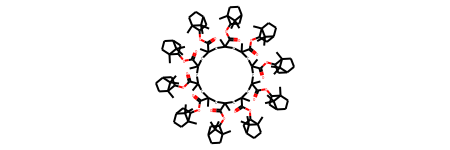

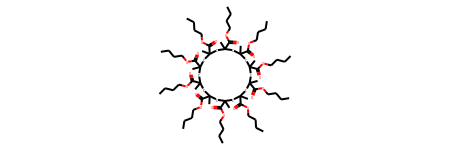

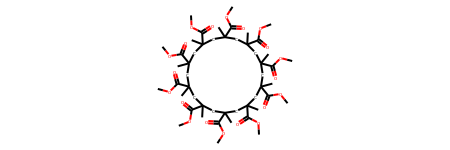

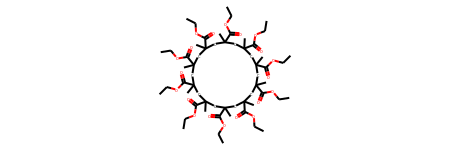

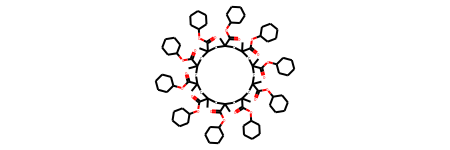

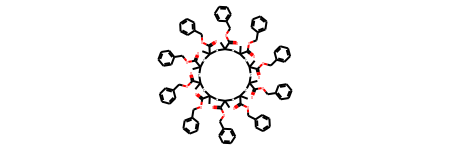

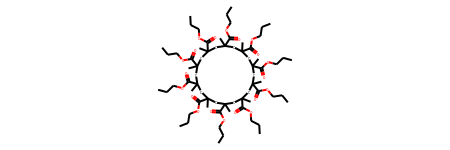

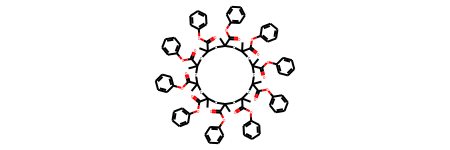

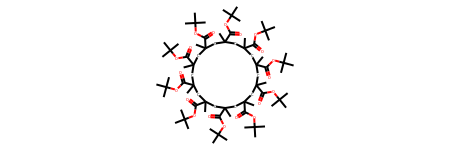

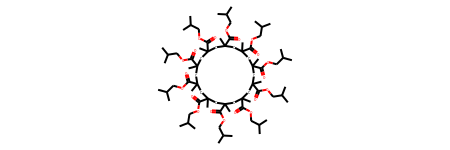

504


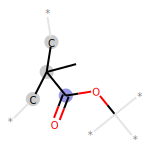

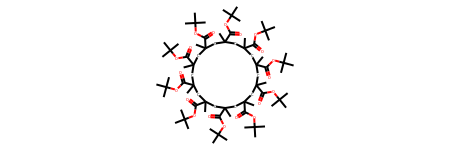

507


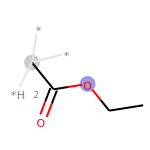

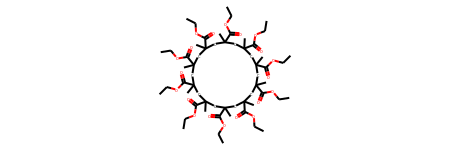

513


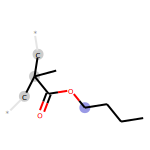

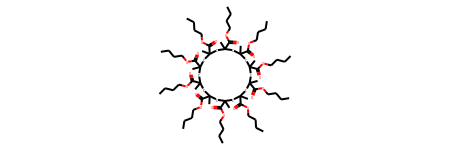

528


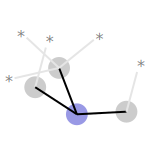

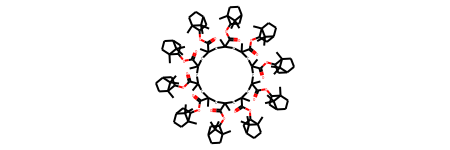

555


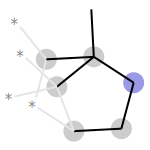

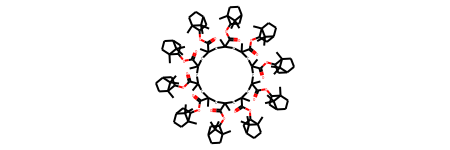

562


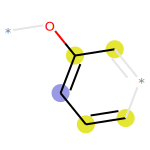

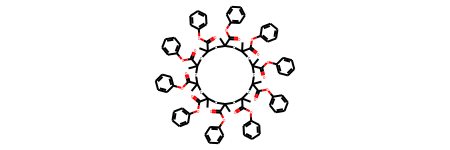

565


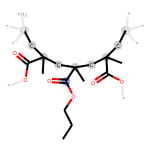

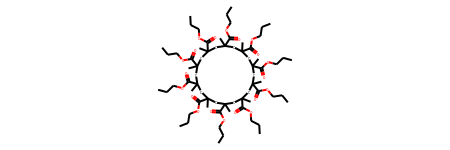

570


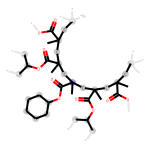

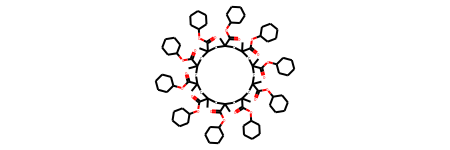

575


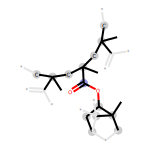

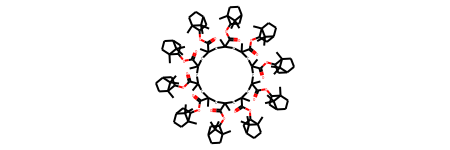

576


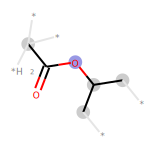

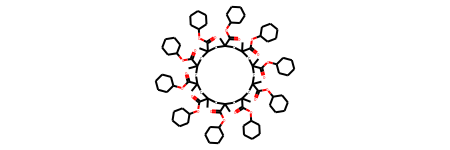

586


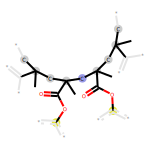

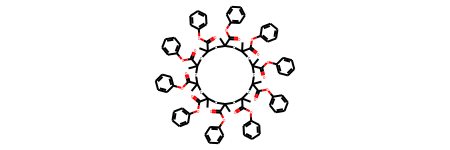

591


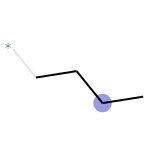

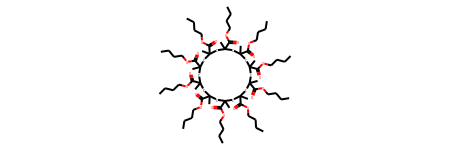

614


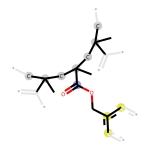

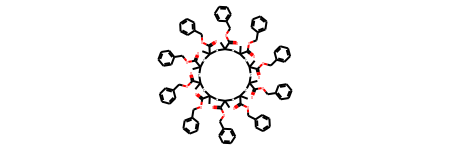

616


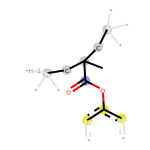

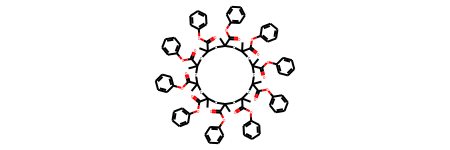

623


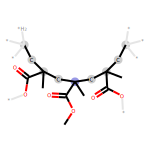

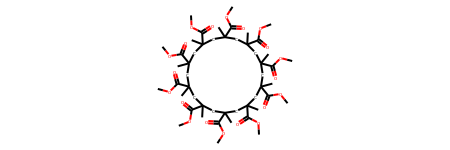

650


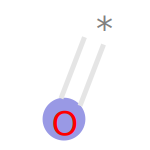

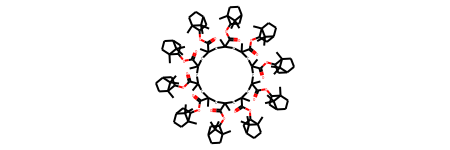

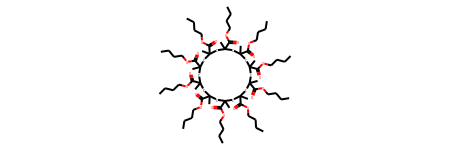

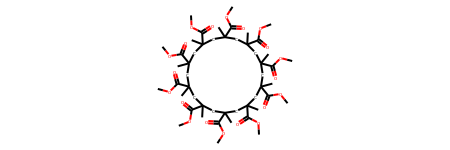

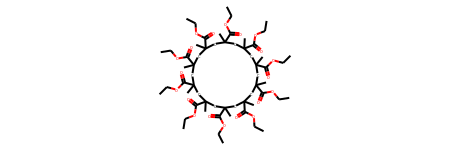

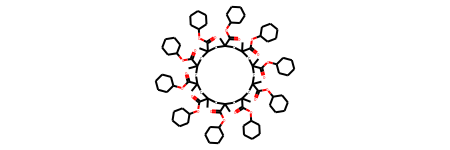

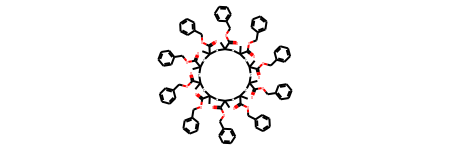

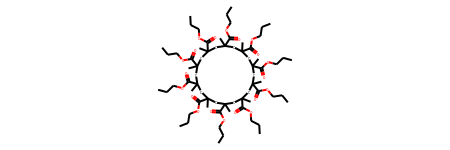

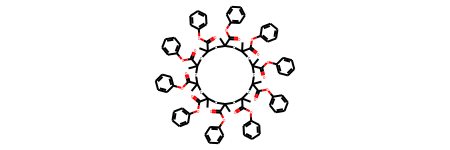

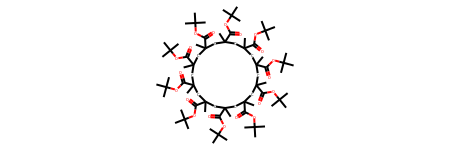

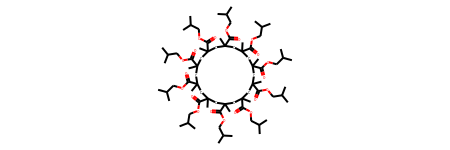

653


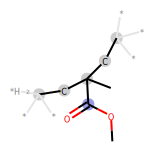

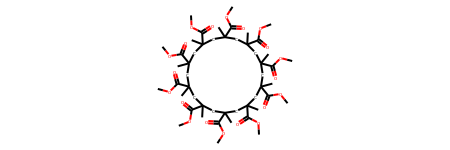

658


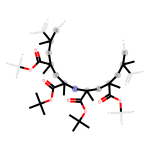

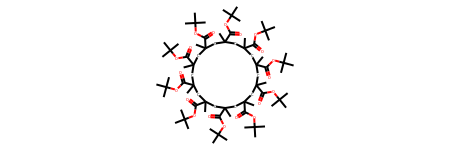

681


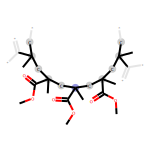

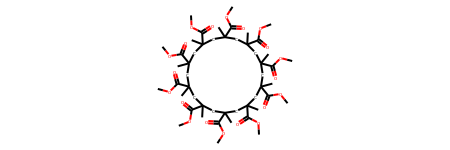

686


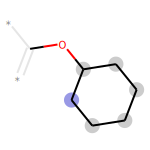

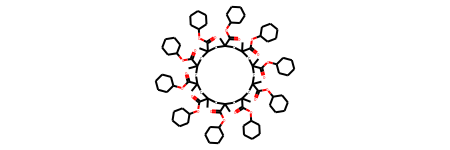

695


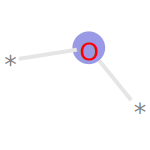

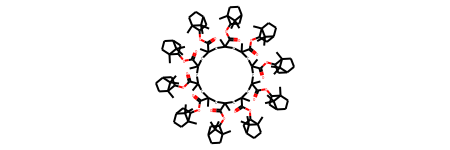

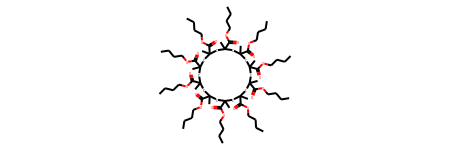

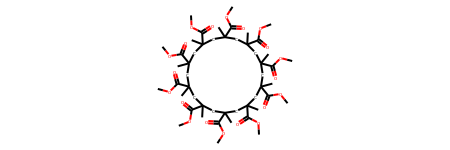

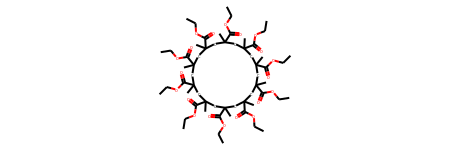

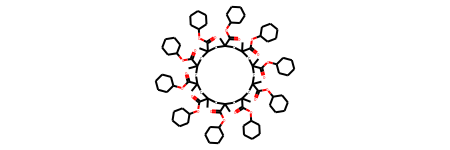

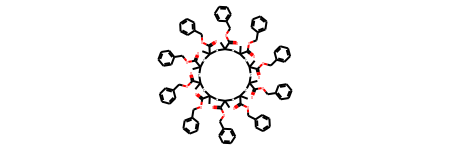

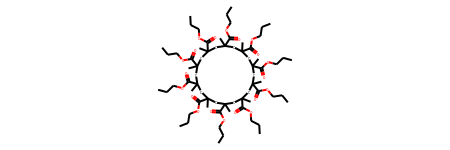

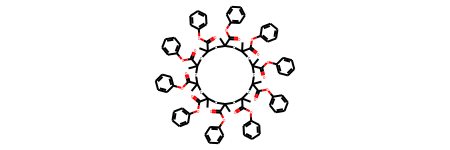

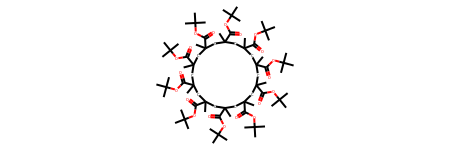

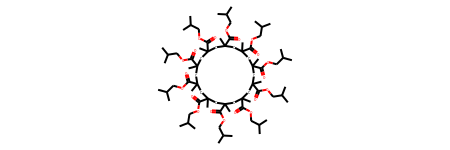

712


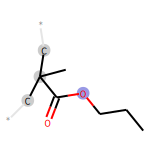

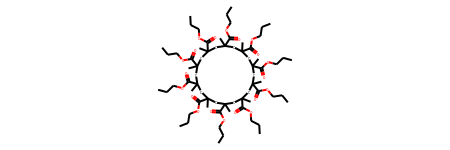

718


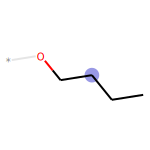

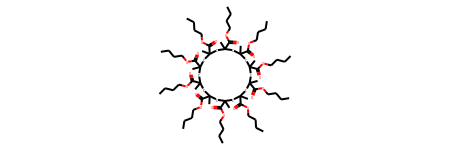

745


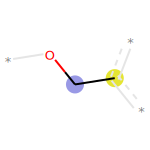

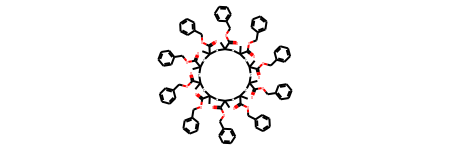

755


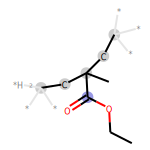

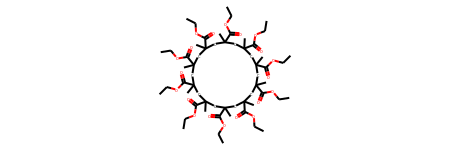

764


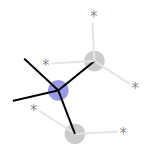

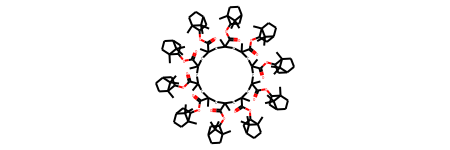

768


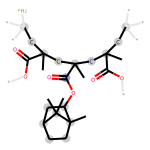

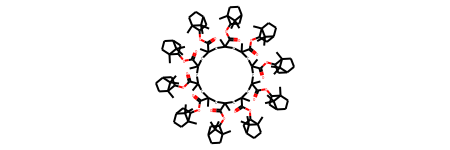

769


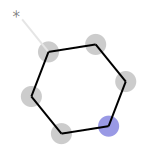

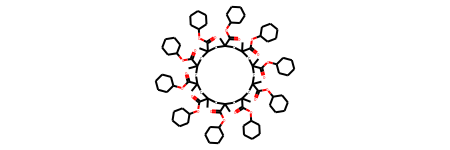

792


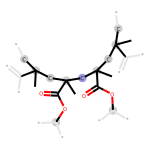

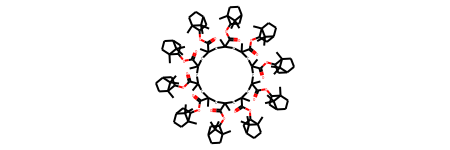

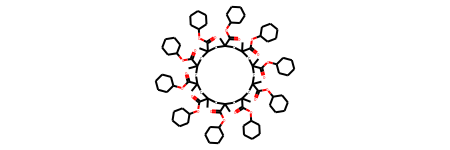

794


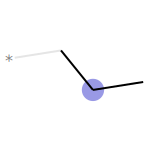

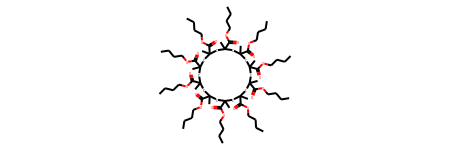

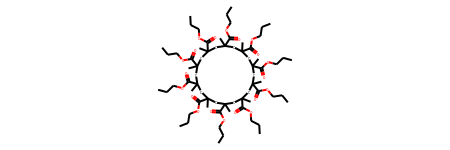

802


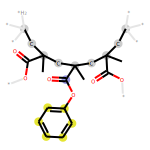

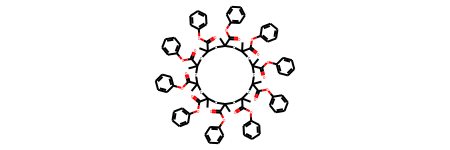

805


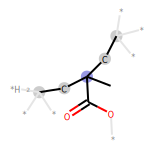

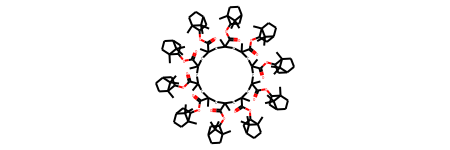

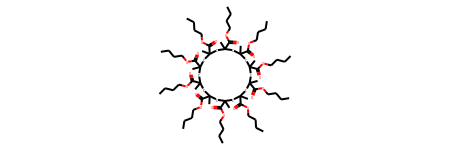

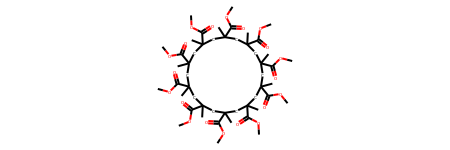

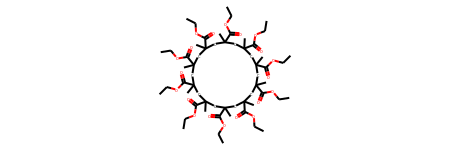

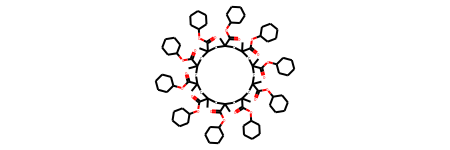

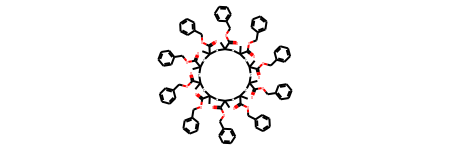

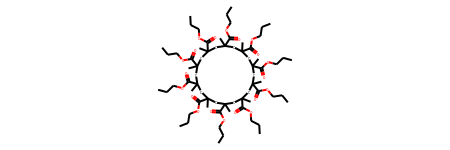

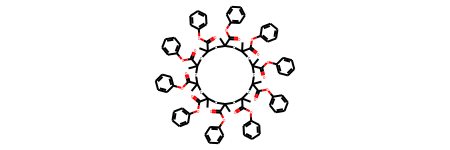

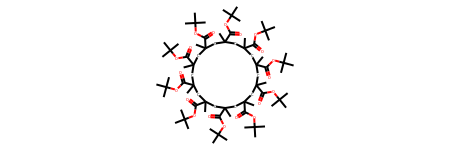

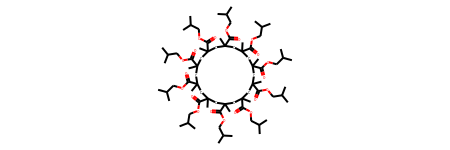

807


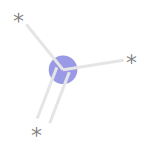

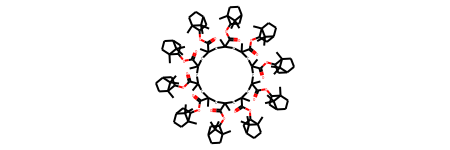

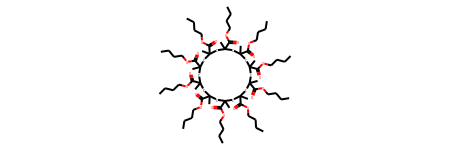

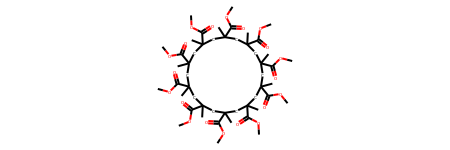

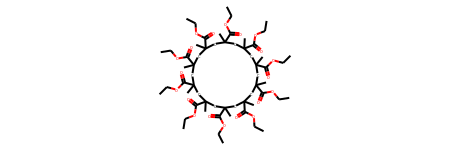

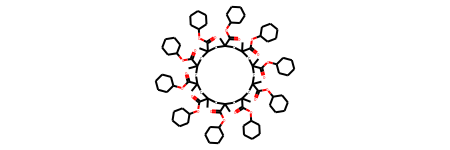

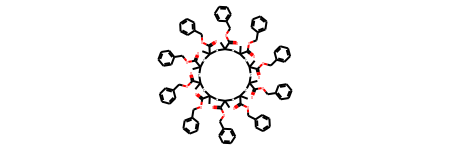

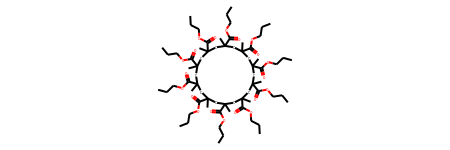

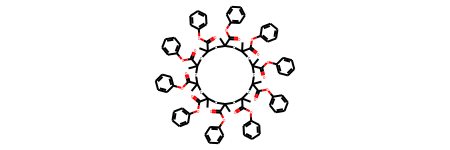

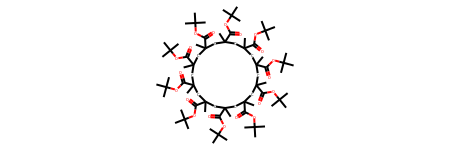

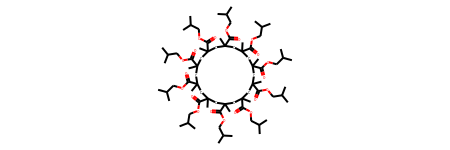

817


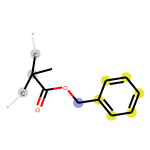

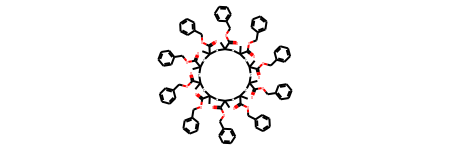

825


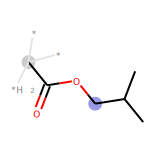

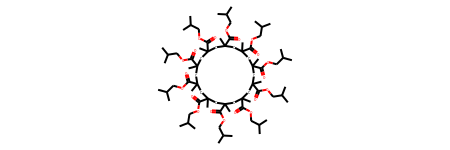

826


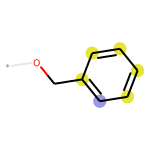

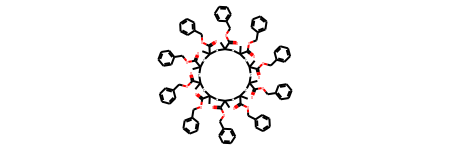

833


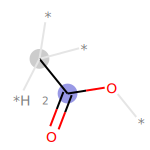

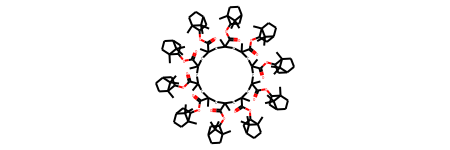

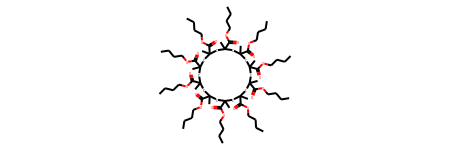

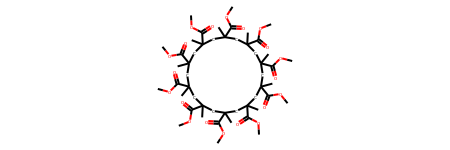

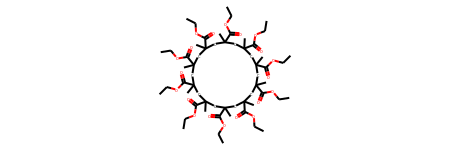

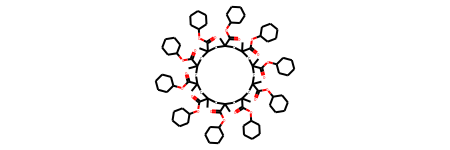

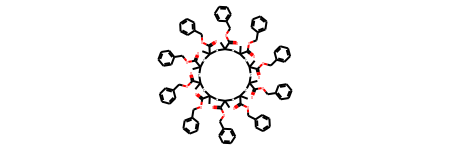

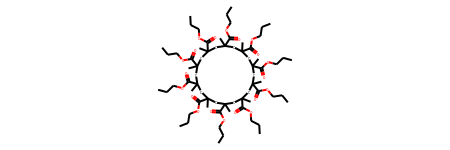

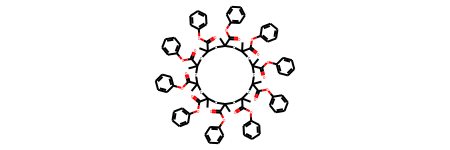

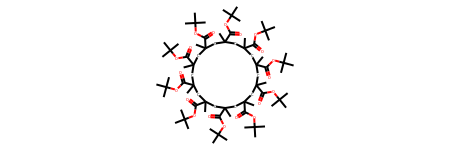

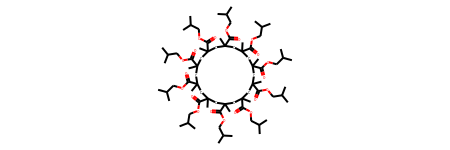

834


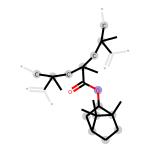

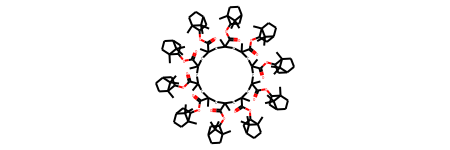

838


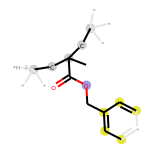

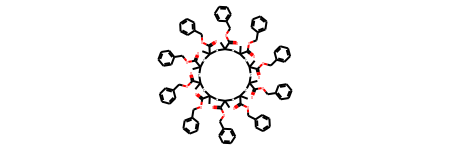

840


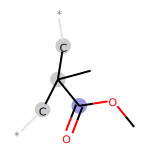

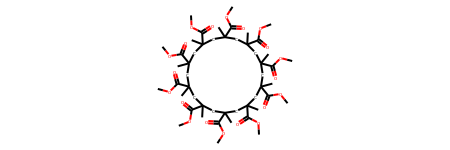

841


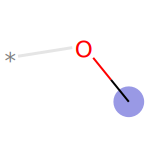

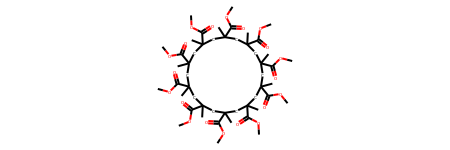

849


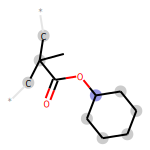

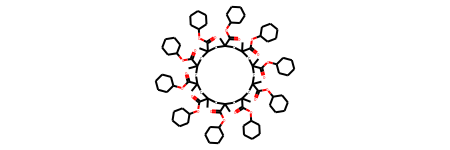

862


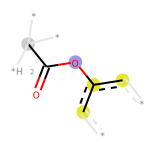

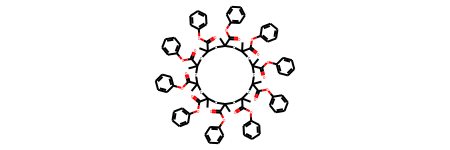

870


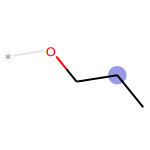

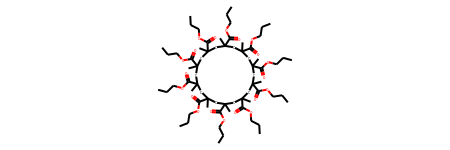

872


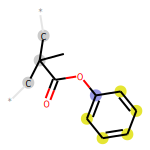

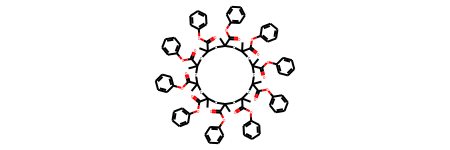

890


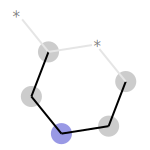

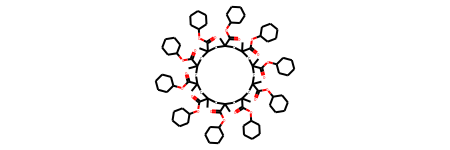

905


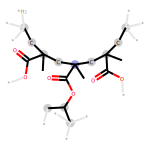

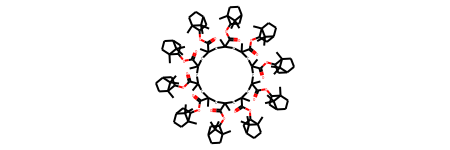

926


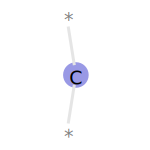

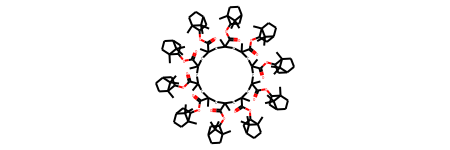

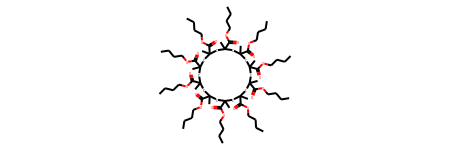

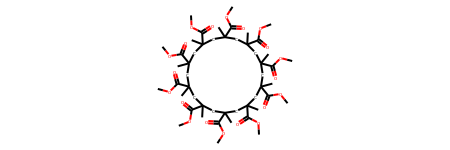

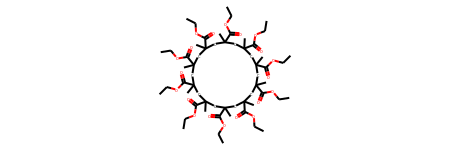

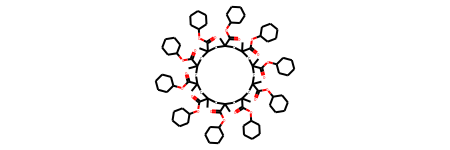

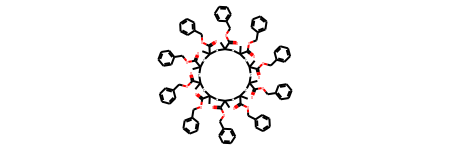

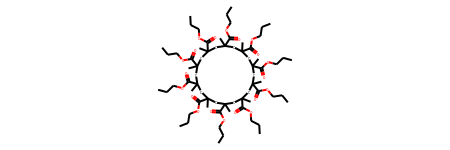

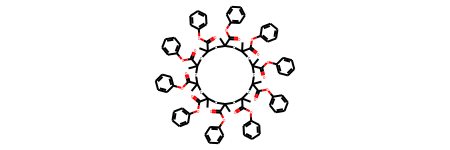

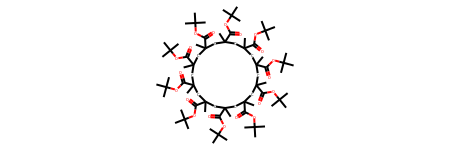

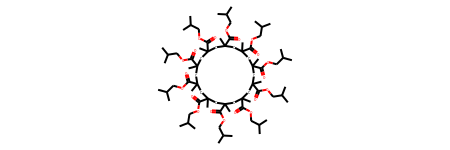

952


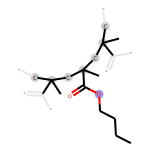

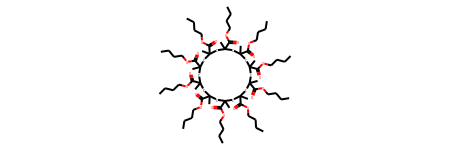

961


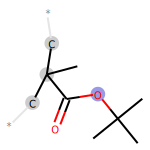

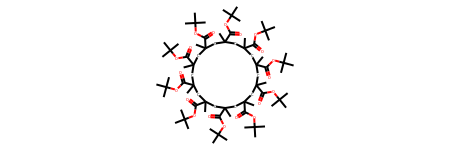

974


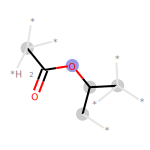

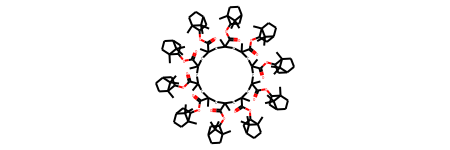

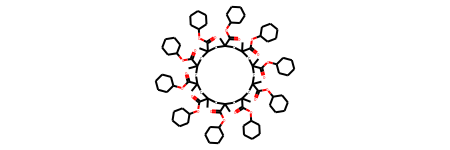

993


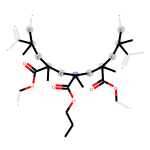

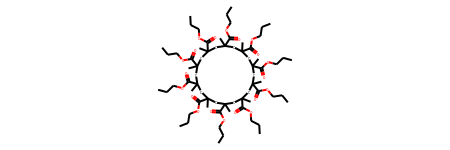

1019


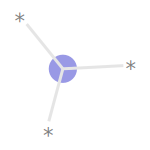

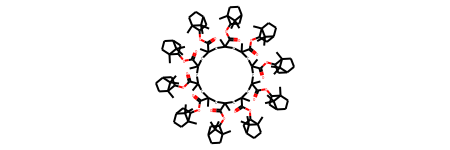

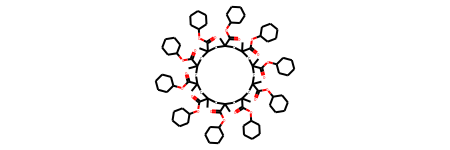

1028


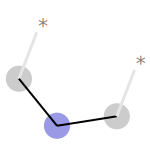

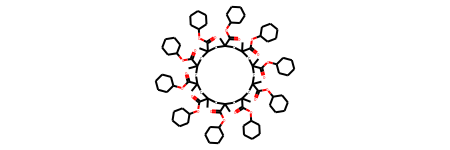

1029


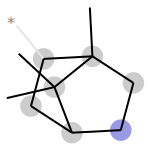

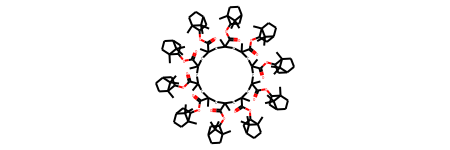

1043


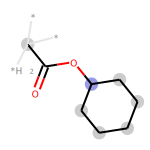

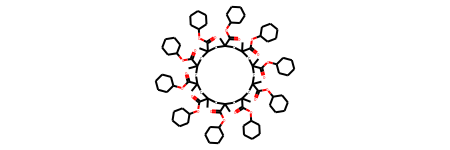

1057


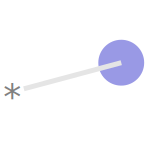

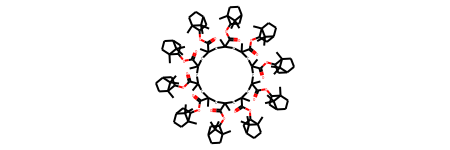

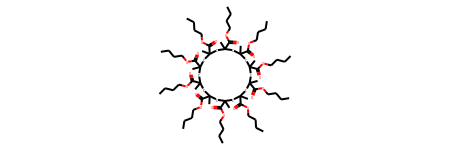

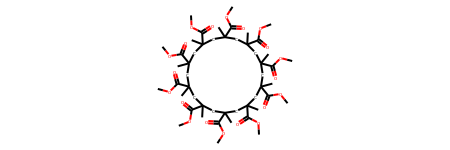

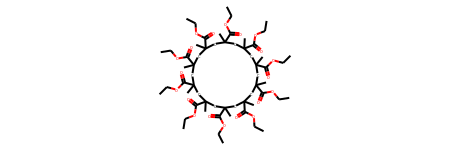

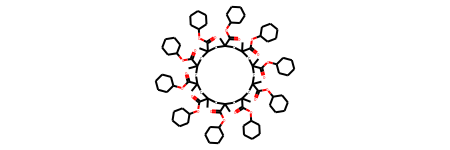

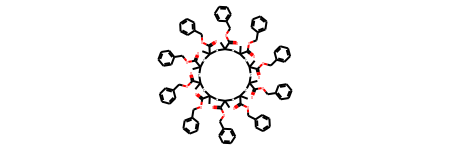

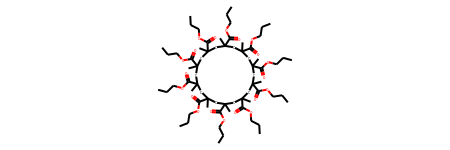

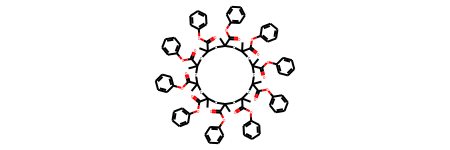

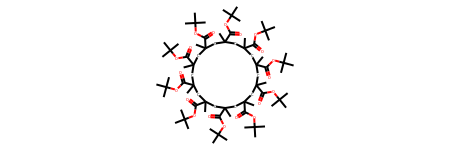

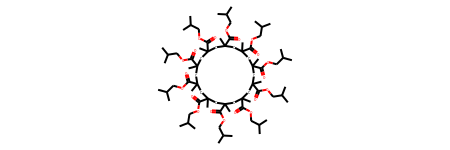

1060


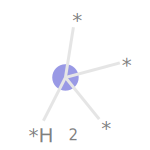

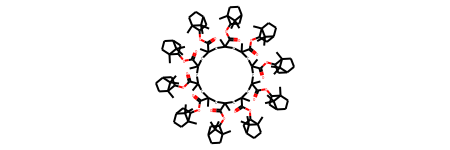

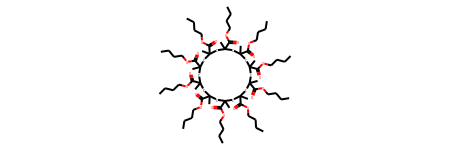

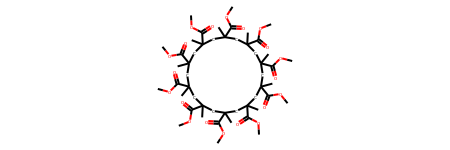

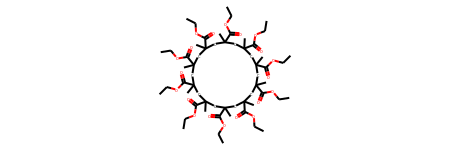

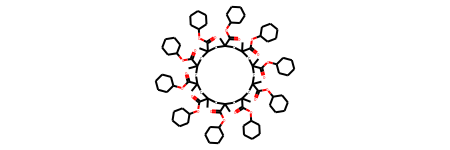

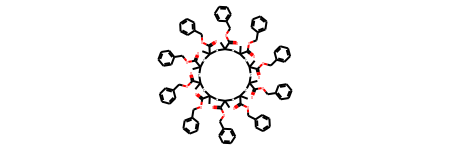

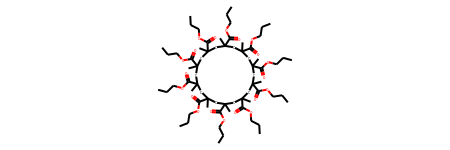

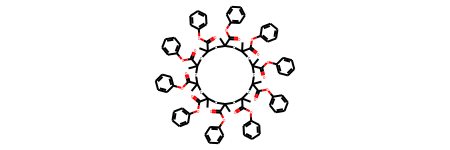

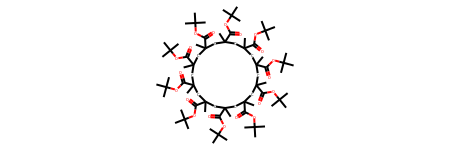

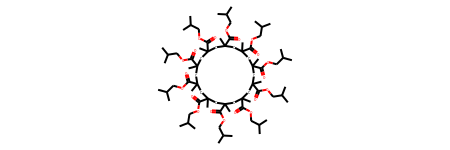

1061


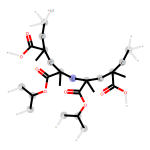

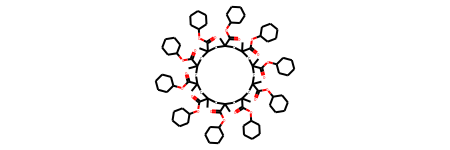

1063


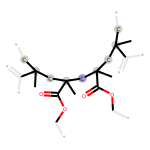

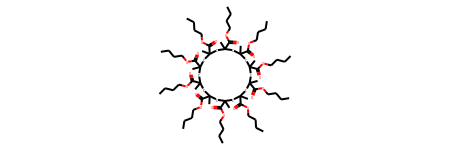

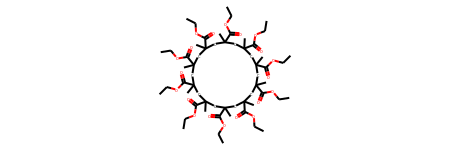

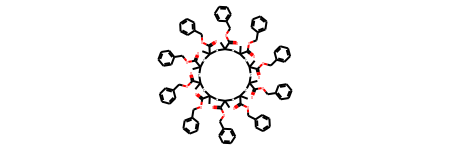

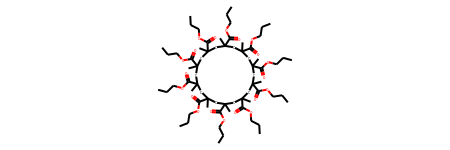

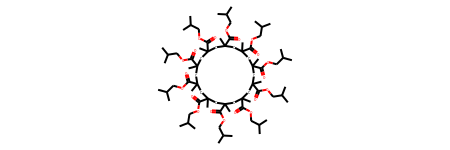

1066


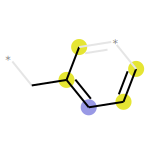

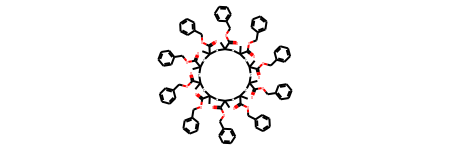

1071


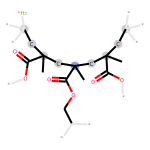

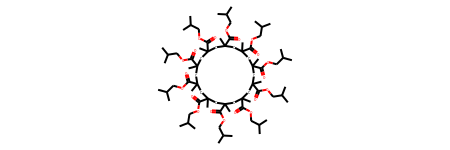

1076


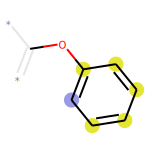

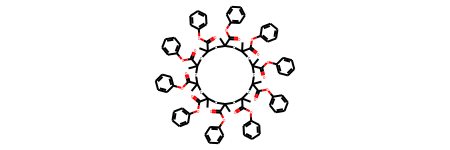

1088


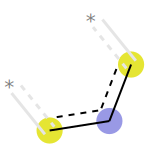

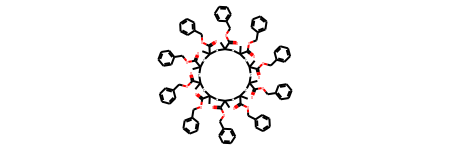

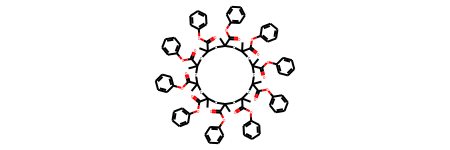

1098


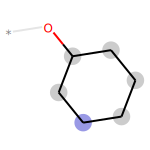

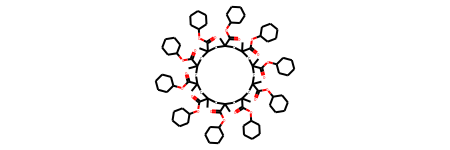

1120


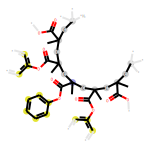

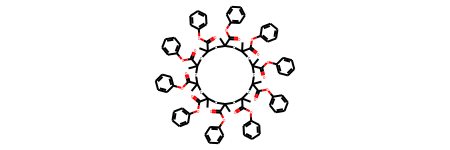

1126


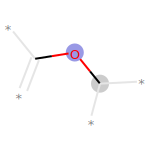

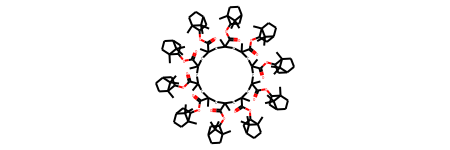

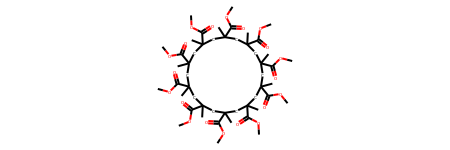

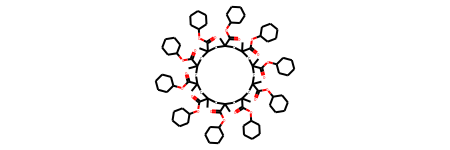

1135


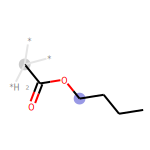

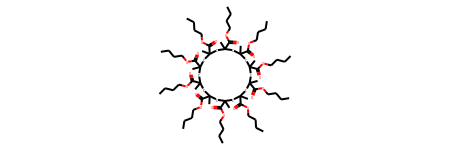

1139


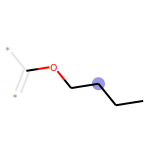

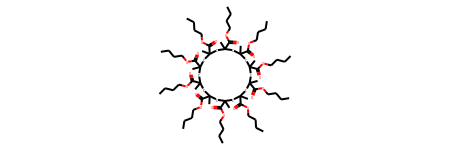

1147


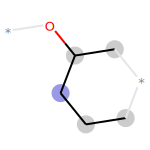

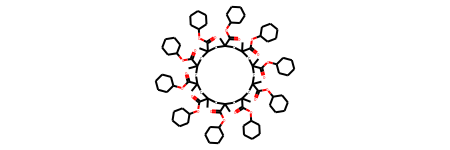

1150


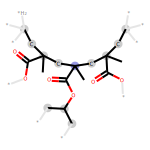

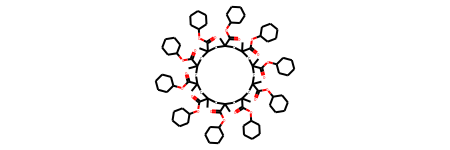

1152


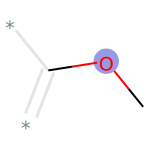

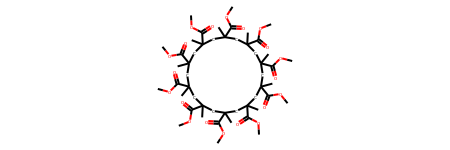

1156


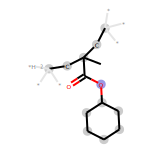

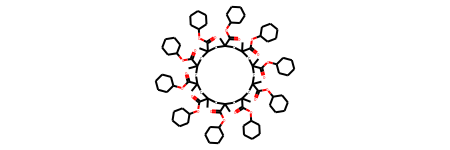

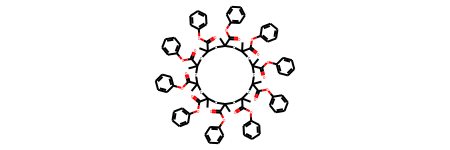

1157


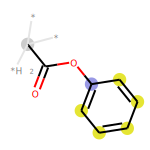

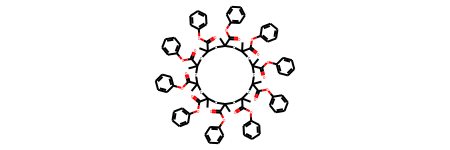

1158


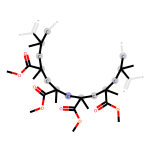

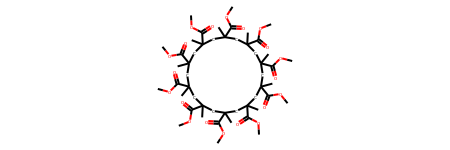

1162


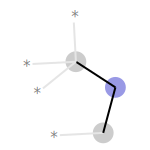

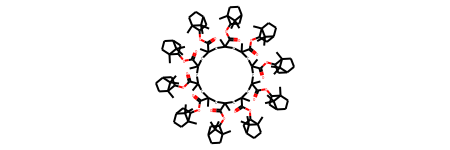

1164


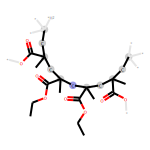

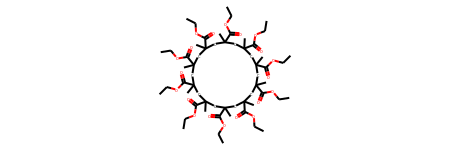

1176


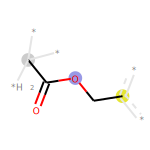

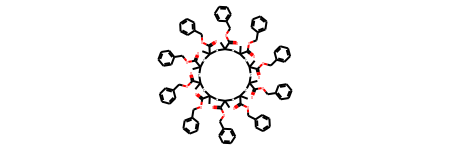

1178


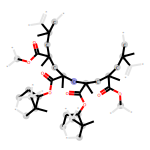

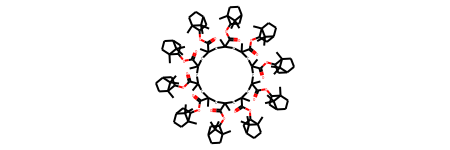

1183


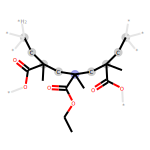

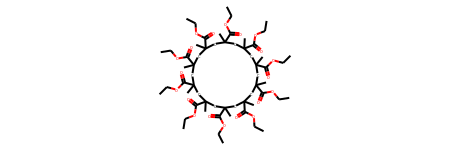

1189


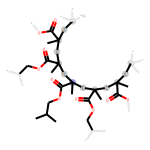

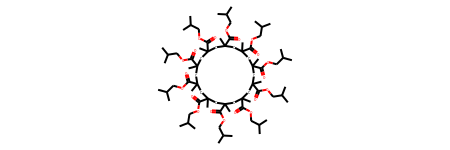

1197


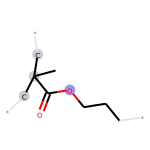

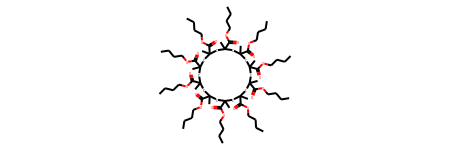

1198


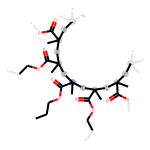

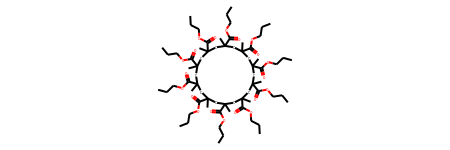

1199


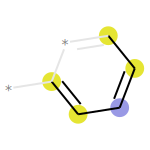

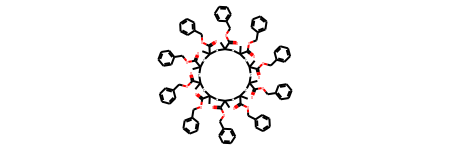

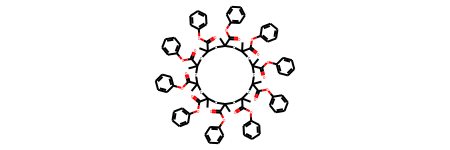

1203


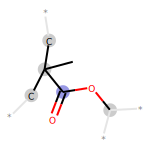

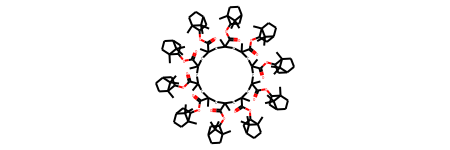

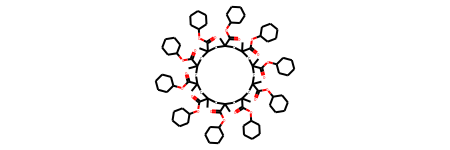

1215


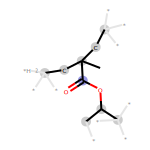

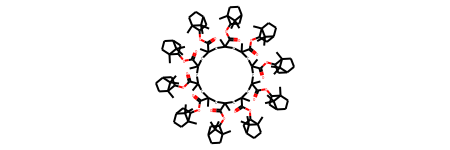

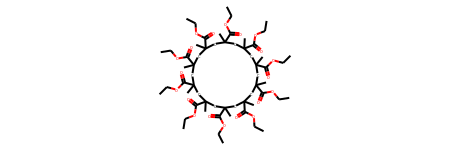

1219


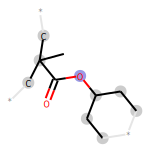

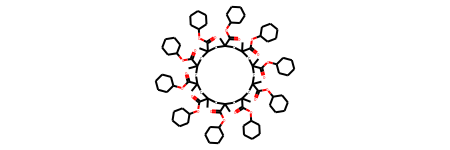

1238


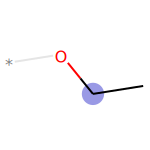

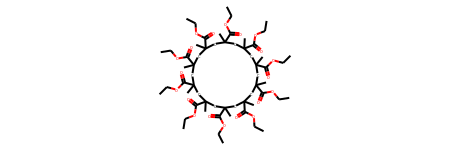

1240


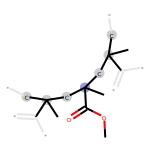

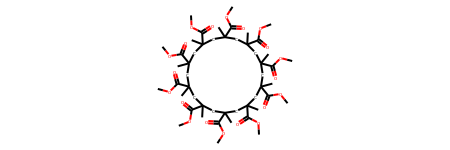

1251


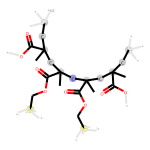

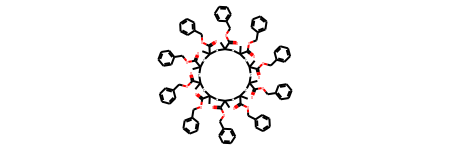

1255


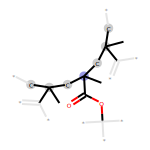

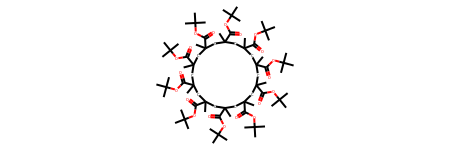

1258


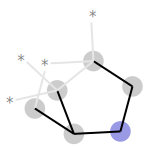

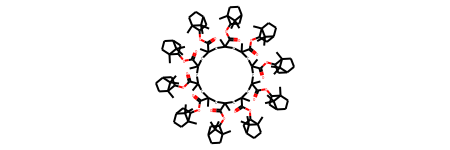

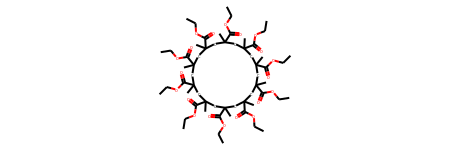

1261


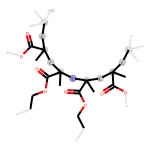

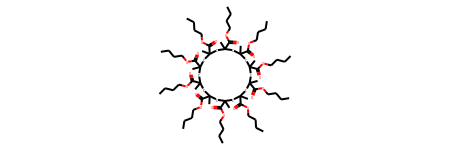

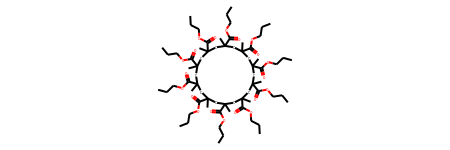

1262


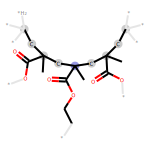

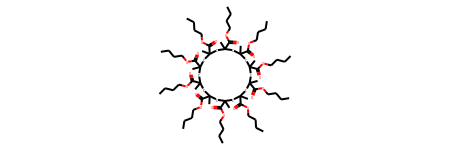

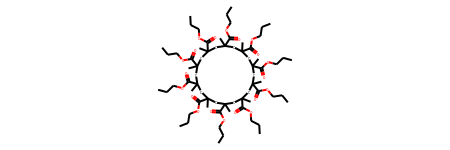

1268


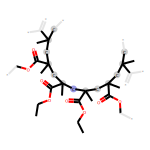

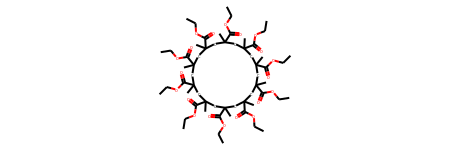

1274


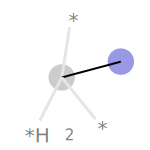

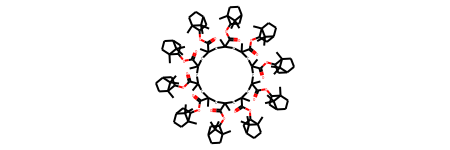

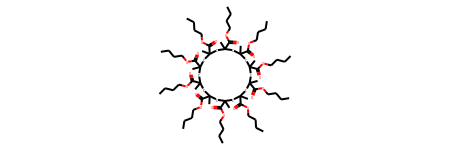

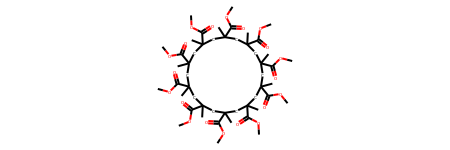

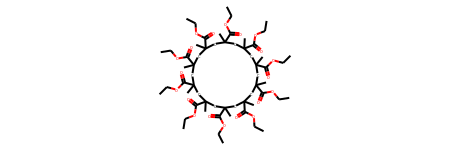

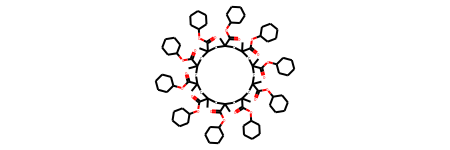

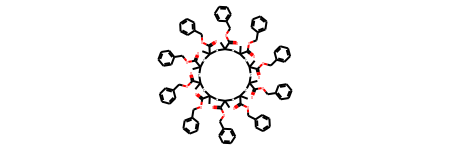

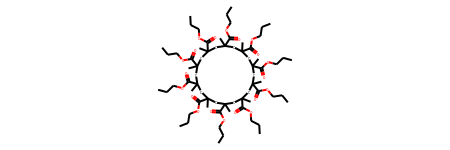

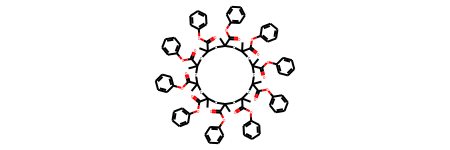

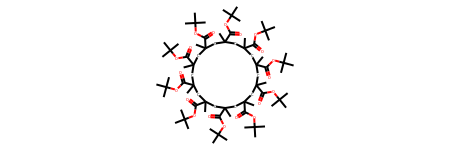

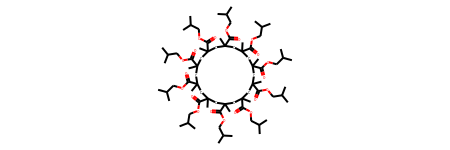

1280


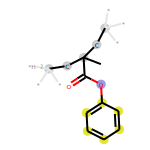

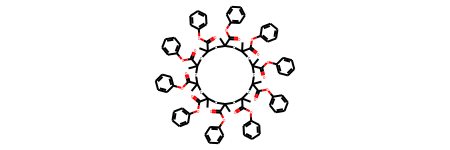

1282


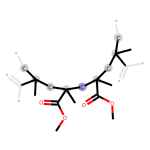

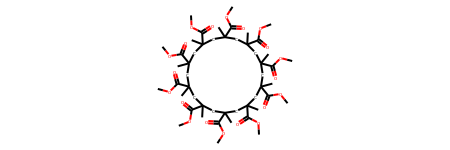

1292


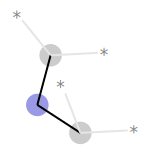

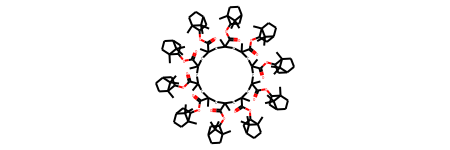

1305


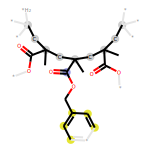

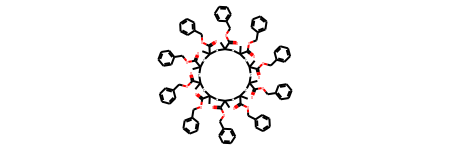

1307


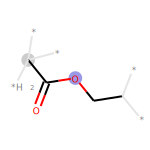

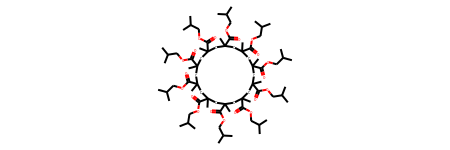

1320


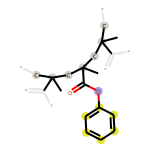

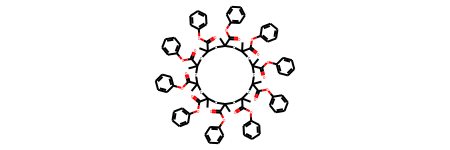

1325


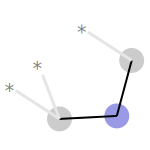

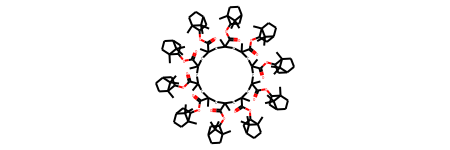

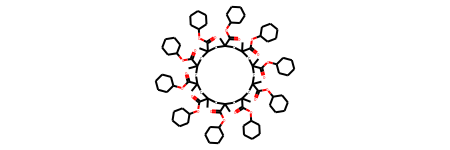

1326


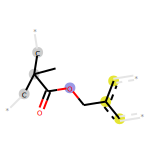

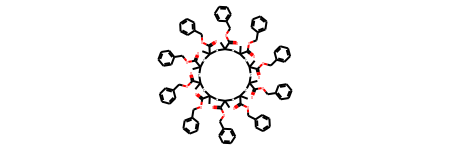

1336


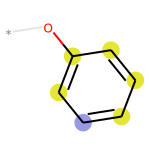

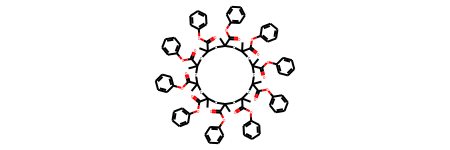

1362


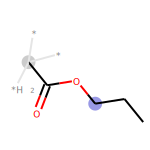

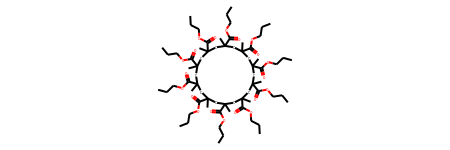

1368


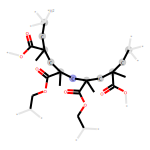

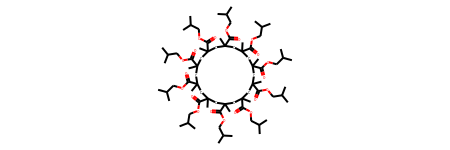

1380


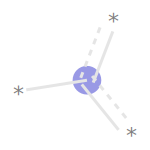

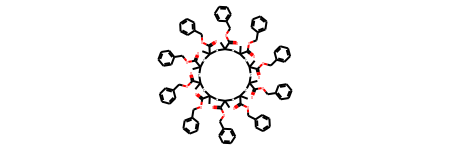

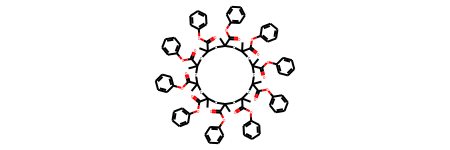

1385


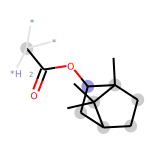

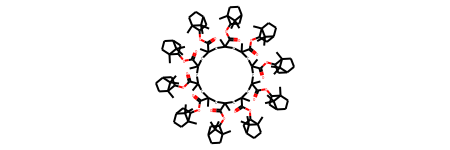

1410


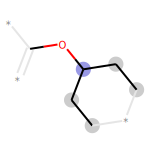

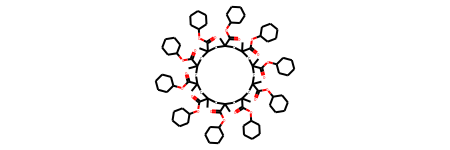

1436


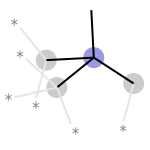

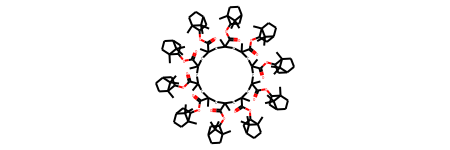

1446


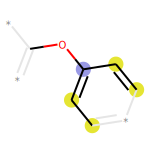

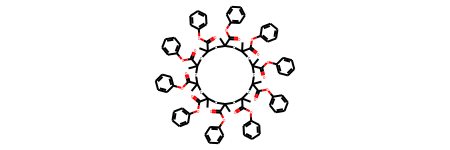

1459


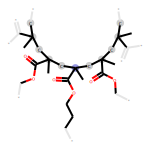

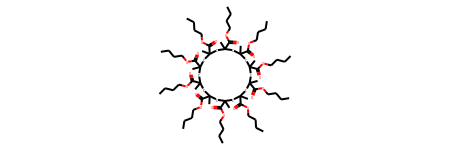

1468


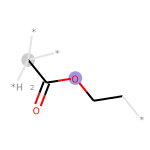

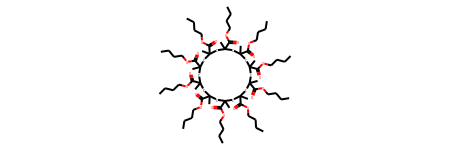

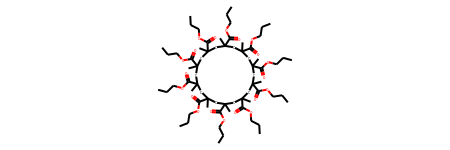

1470


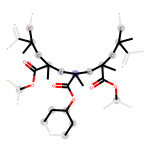

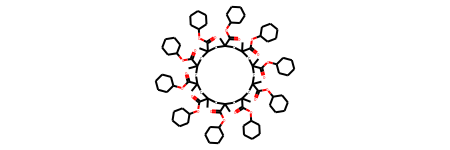

1484


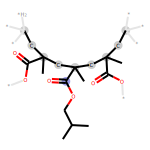

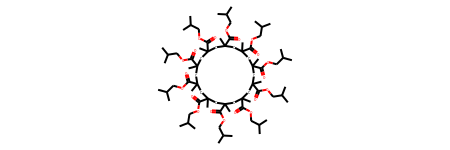

1496


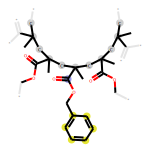

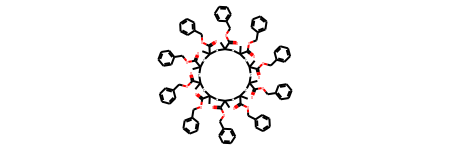

1506


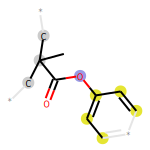

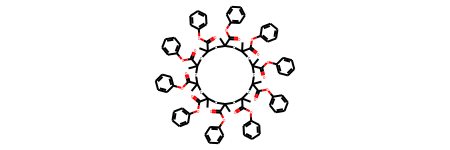

1512


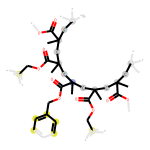

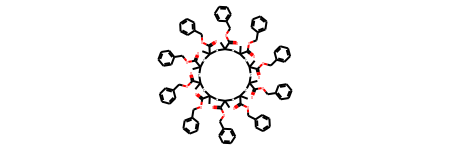

1572


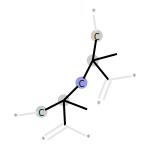

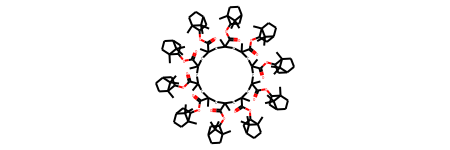

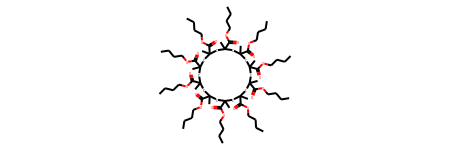

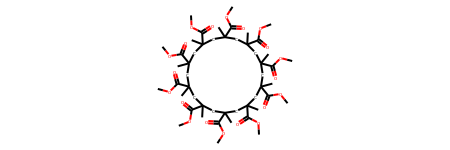

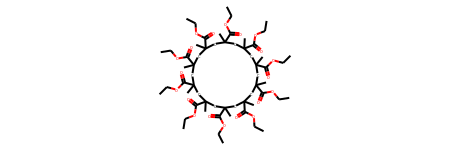

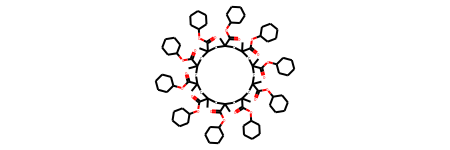

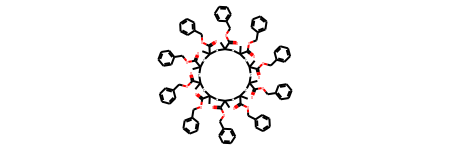

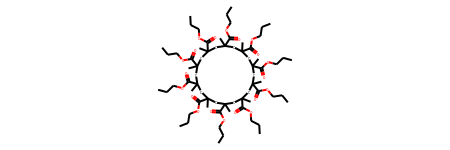

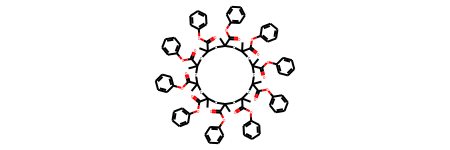

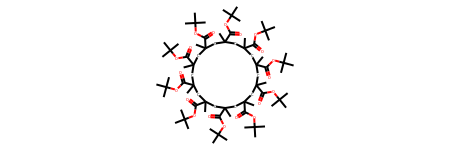

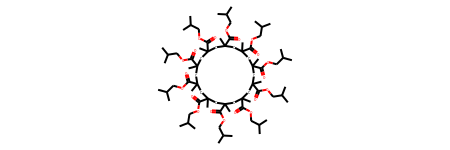

1574


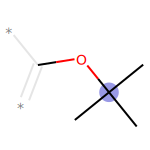

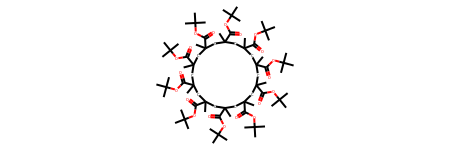

1577


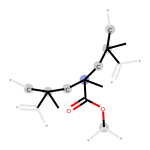

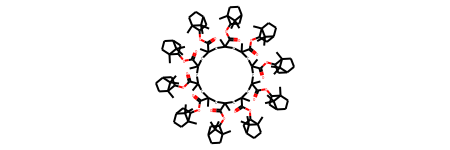

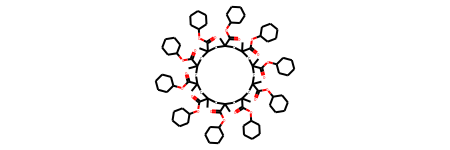

1598


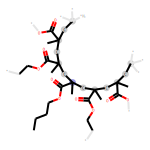

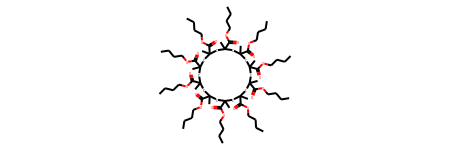

1601


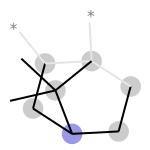

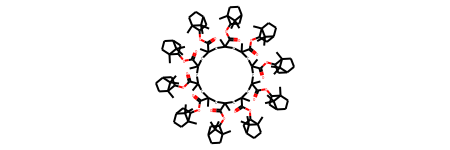

1608


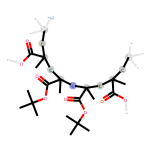

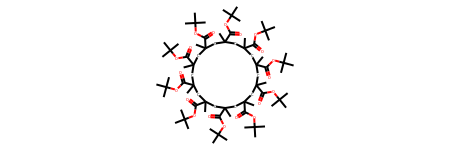

1616


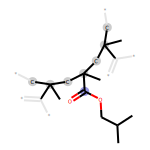

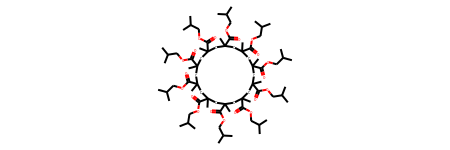

1621


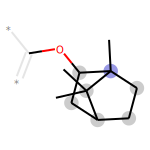

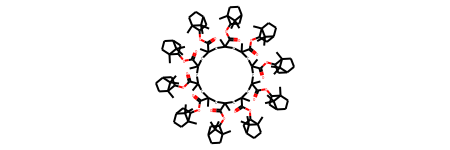

1644


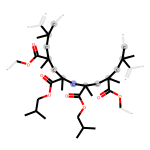

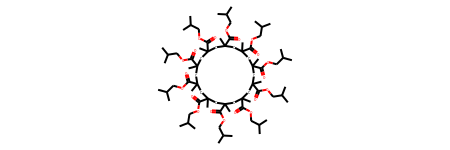

1649


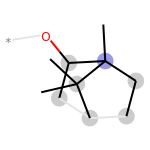

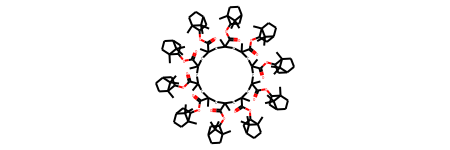

1651


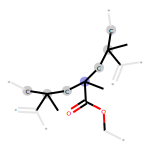

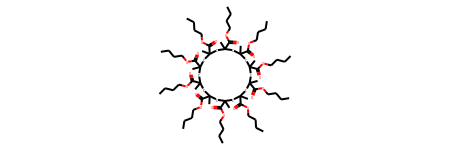

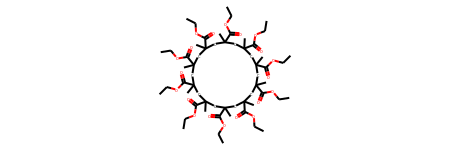

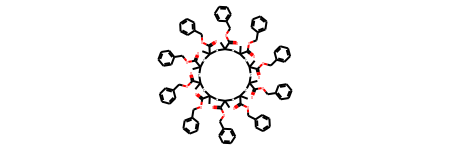

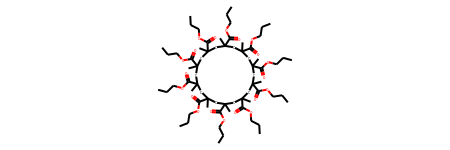

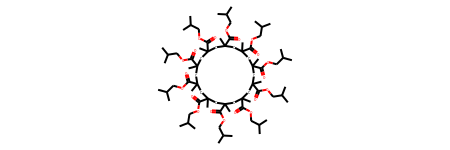

1658


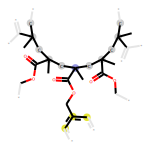

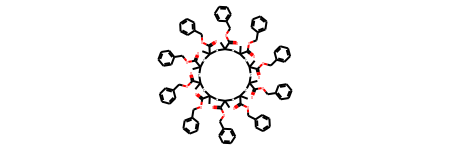

1662


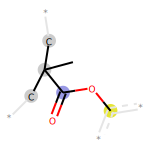

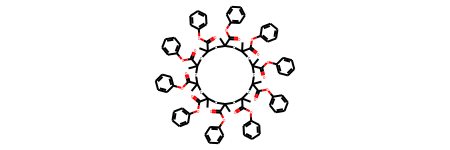

1678


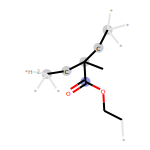

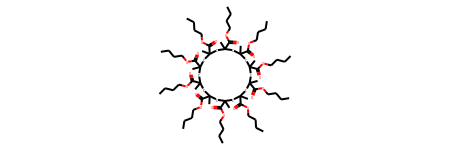

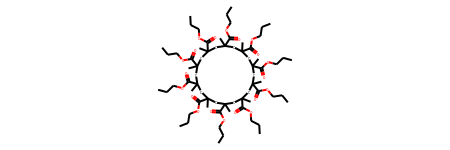

1681


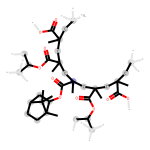

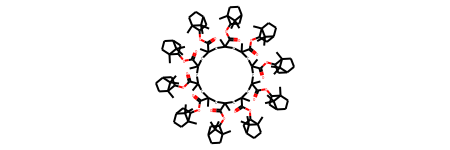

1685


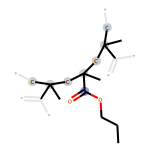

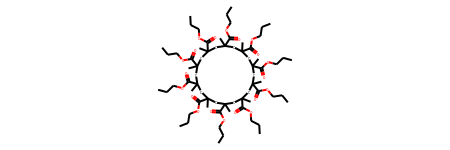

1695


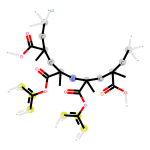

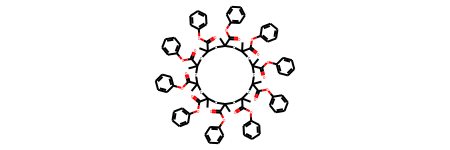

1701


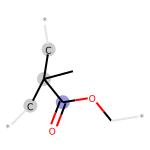

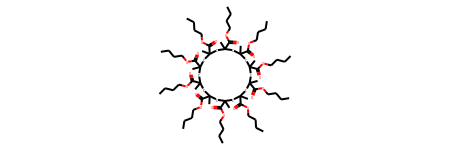

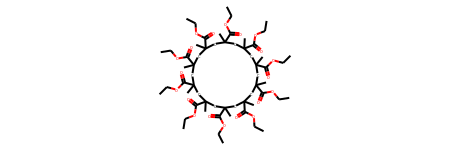

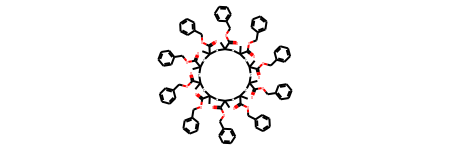

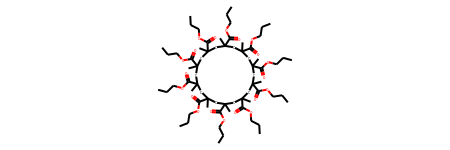

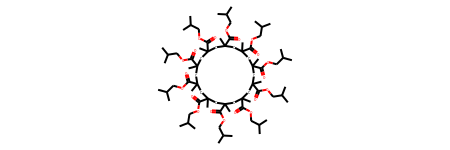

1703


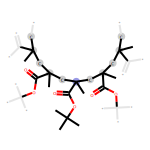

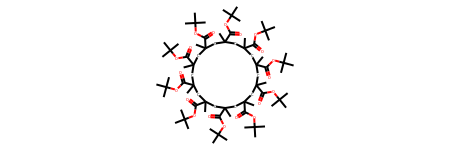

1713


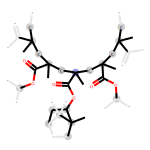

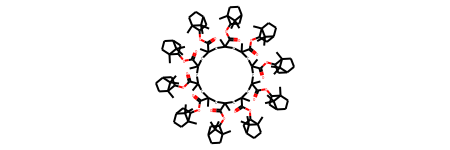

1722


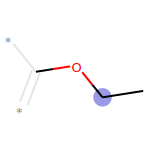

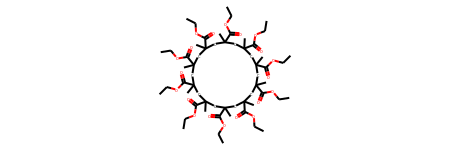

1729


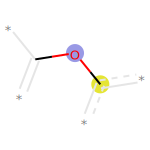

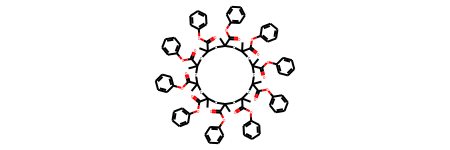

1734


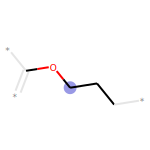

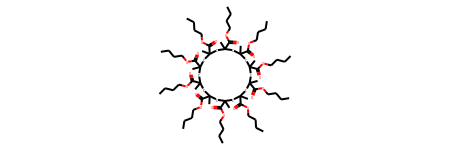

1735


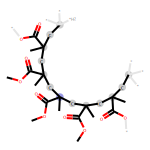

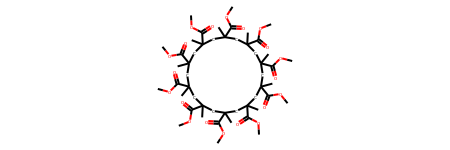

1738


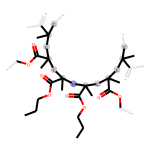

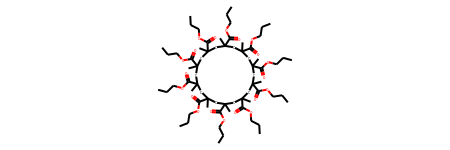

1744


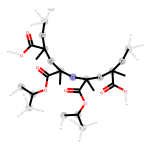

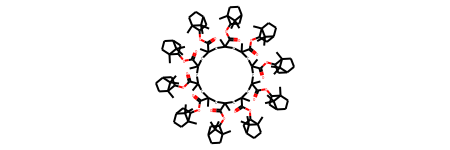

1750


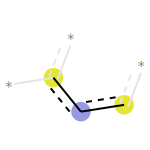

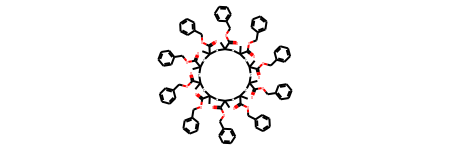

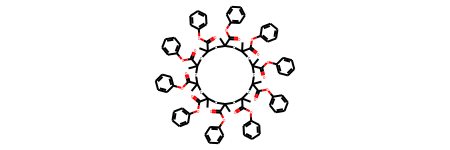

1754


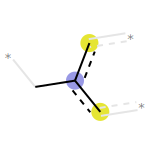

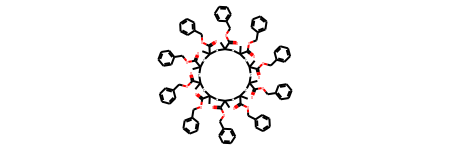

1756


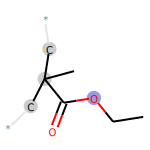

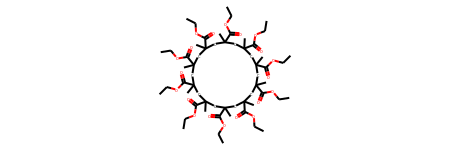

1780


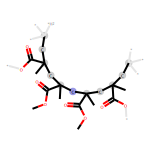

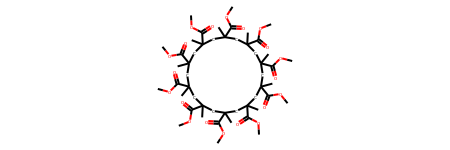

1813


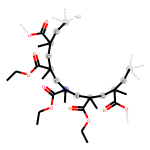

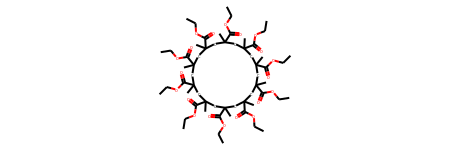

1819


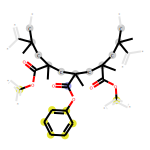

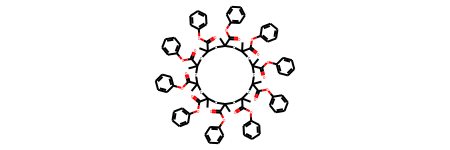

1830


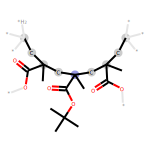

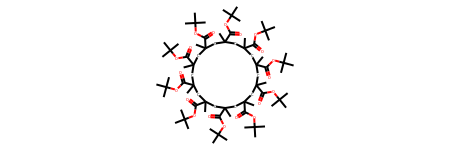

1832


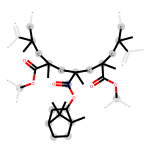

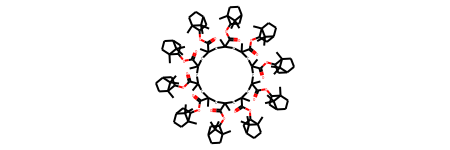

1847


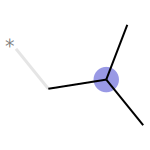

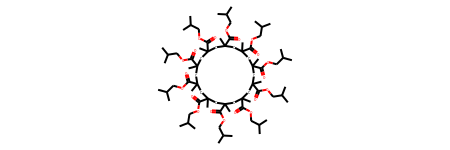

1850


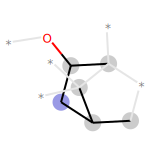

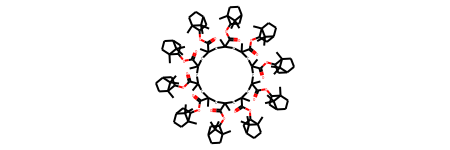

1859


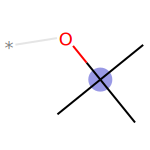

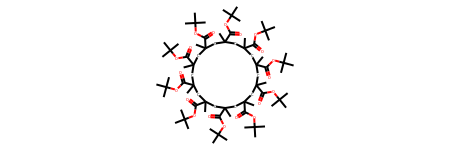

1870


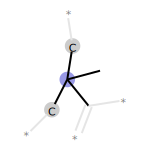

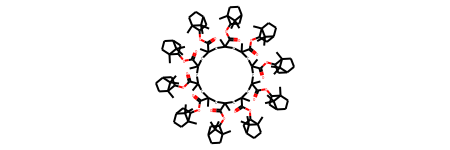

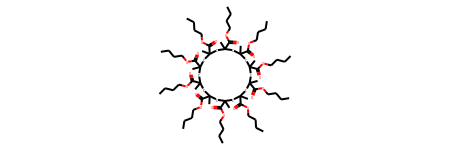

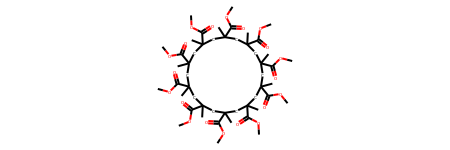

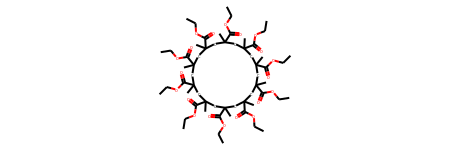

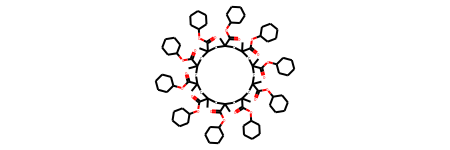

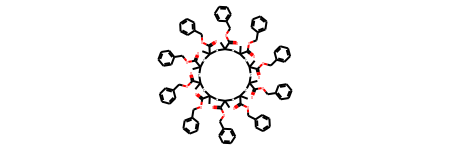

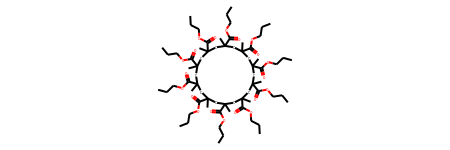

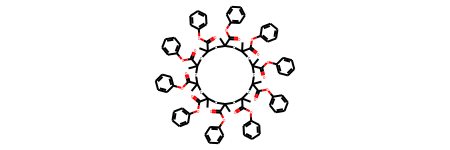

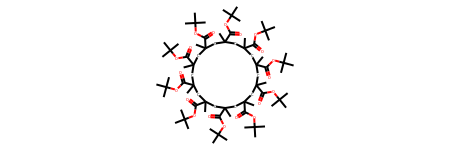

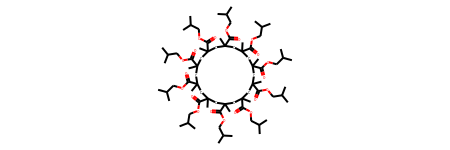

1873


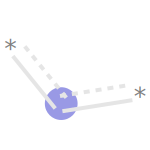

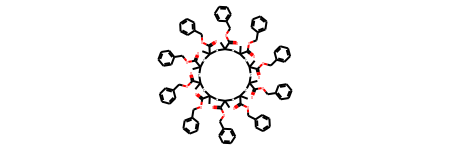

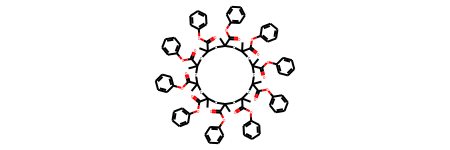

1884


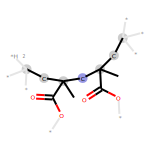

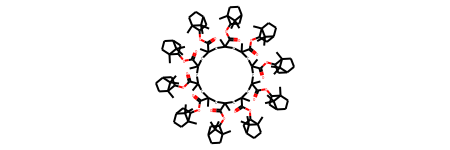

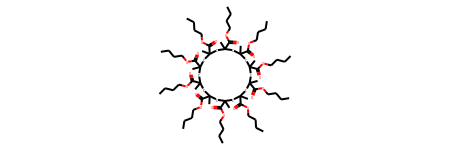

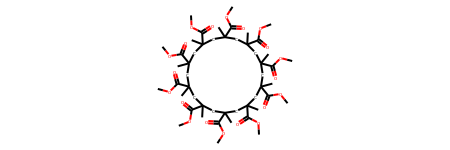

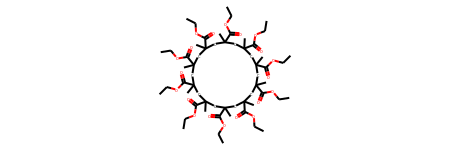

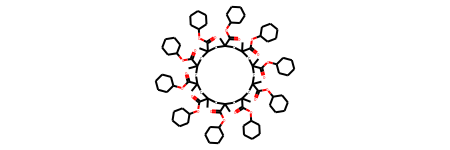

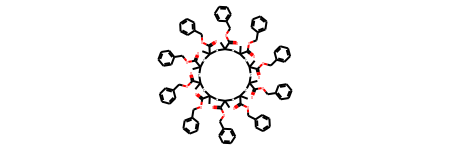

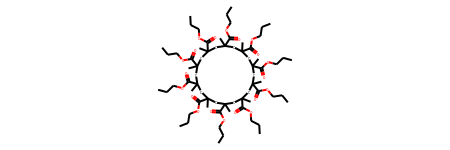

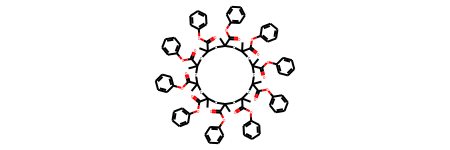

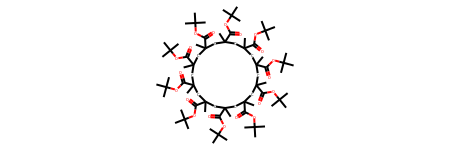

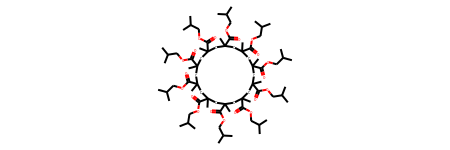

1911


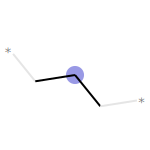

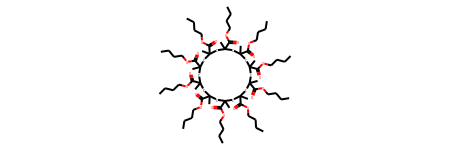

1914


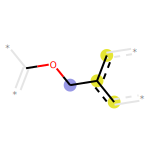

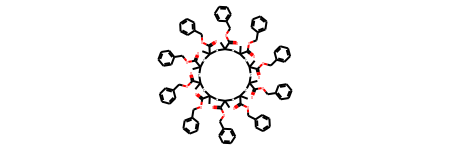

1917


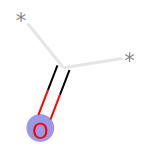

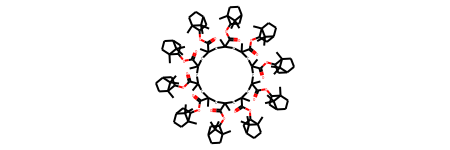

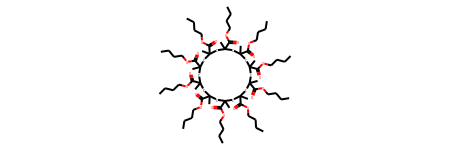

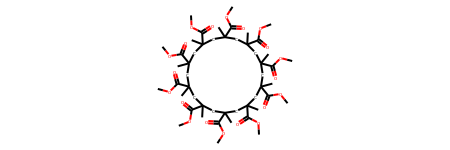

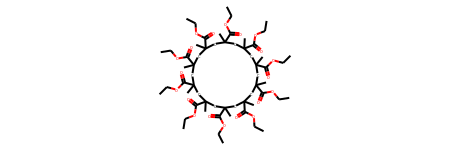

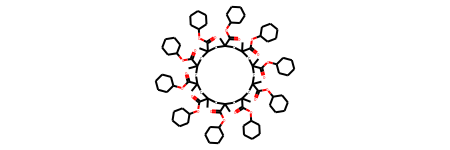

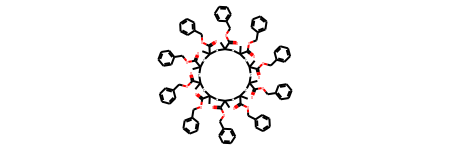

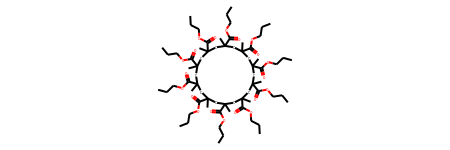

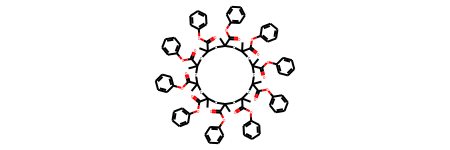

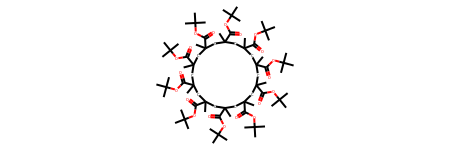

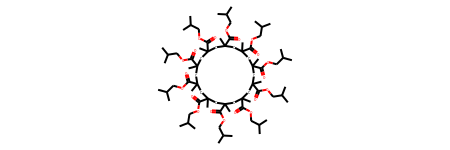

1924


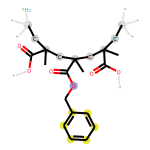

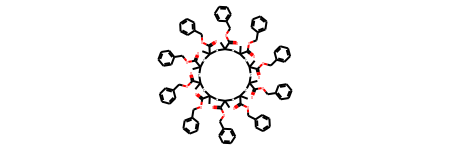

1931


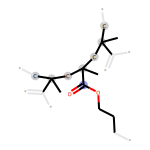

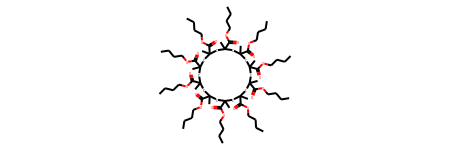

1945


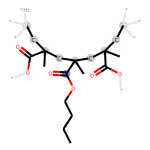

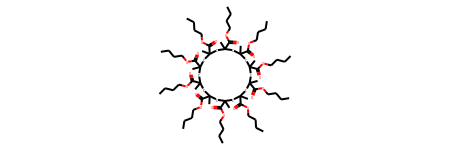

1947


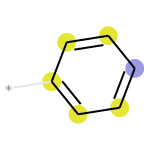

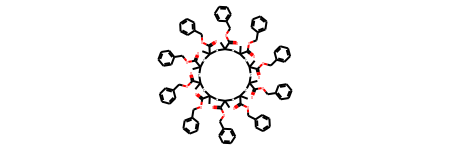

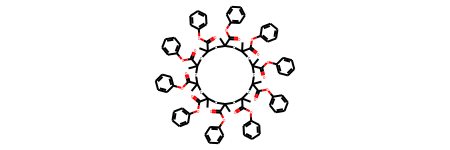

1979


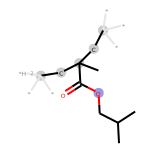

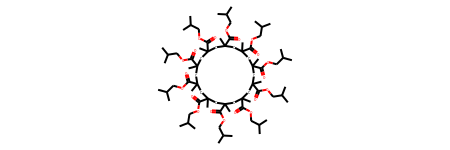

2008


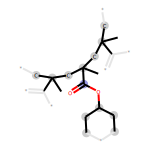

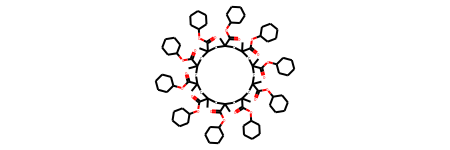

2017


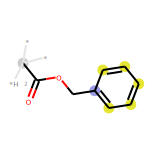

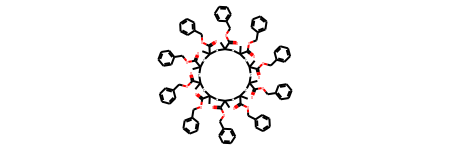

2019


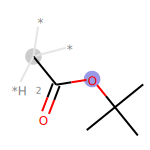

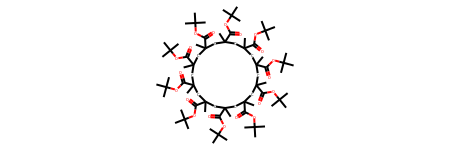

2024


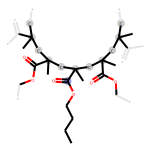

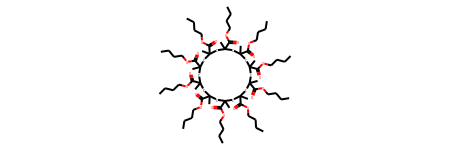

2038


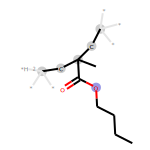

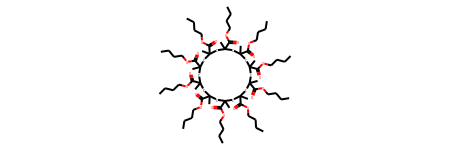

2042


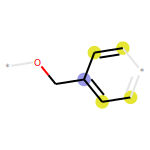

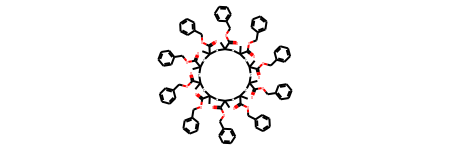

2046


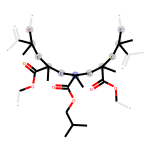

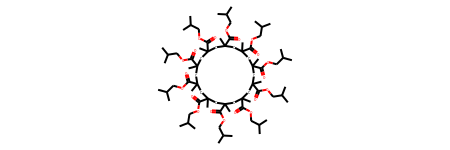

220

In [16]:
xin=0
for i in range(len(list(np_fingerprints.values())[0])):
    _in = False
    for smiles, mol in mols.items():
        if np_fingerprints[smiles][i]>0:
            
            if not _in:
                print(i)
                xin+=1
                _in = True
                bi={}
                fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=fingerprint_radius, bitInfo=bi,nBits=fingerprint_bits)
                mfp2_svg = rdkit.Chem.Draw.DrawMorganBit(mol, i, bi, useSVG=True)
                display(mfp2_svg)
            display(mol)
xin 

In [21]:
from sklearn.model_selection import train_test_split
features = []
labels=[]
for index,row in train_df.iterrows():
    labels.append(row["z_average"])
    features.append([
        row["pdi"],
        row["dp"],
        row["with_pva"],
        row["polymer_concentration"]
    ]+list(row["fingerprint"]))
#    features.extend()
labels=np.array(labels)
features=np.array(features)
#    'pdi', 'dp', 'with_pva', 'polymer_concentration'

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = test_size, random_state = random_state)

features = []
labels=[]
for index,row in test_df.iterrows():
    labels.append(row["z_average"])
    features.append([
        row["pdi"],
        row["dp"],
        row["with_pva"],
        row["polymer_concentration"]
    ]+list(row["fingerprint"]))
#    features.extend()
validate_labels=np.array(labels)
validate_features=np.array(features)

In [118]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf_study = optuna.create_study()

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
FrozenTrial(number=9, value=7.481633769704537, datetime_start=datetime.datetime(2020, 7, 30, 9, 41, 51, 21871), datetime_complete=datetime.datetime(2020, 7, 30, 9, 41, 53, 319594), params={'n_estimators': 71.0, 'max_features': None}, distributions={'n_estimators': DiscreteUniformDistribution(high=150, low=1, q=1), 'max_features': CategoricalDistribution(choices=('auto', None, 'sqrt', 'log2'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=9, state=TrialState.COMPLETE)


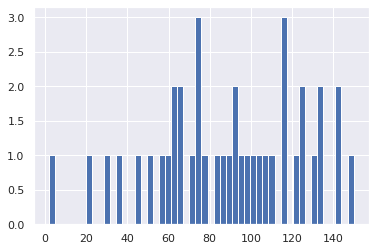

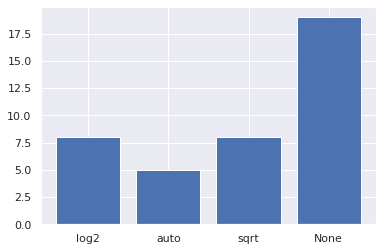

RMSE 11.169946459816627


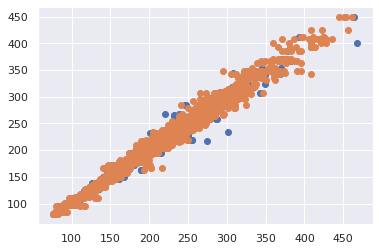

In [125]:
def random_forest_HPO(trial):
    print(trial.number)
    n_estimators = trial.suggest_discrete_uniform('n_estimators', 1, 150,1)
    max_features = trial.suggest_categorical('max_features',  ["auto", None, "sqrt", "log2"])
    tree = RandomForestRegressor(n_estimators=int(n_estimators), max_features=max_features)
    fit = tree.fit(train_features, train_labels)
    # Use the forest's predict method on the test data
    predictions = tree.predict(test_features)# Calculate the absolute errors
    errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
    return np.mean(errors)

rf_study.optimize(random_forest_HPO, n_trials=20)
print(rf_study.best_trial)

ests=[]
feats={}
for trial in rf_study.trials:
    ests.append(trial.params['n_estimators'])
    if trial.params['max_features'] not in feats:
        feats[trial.params['max_features']]=0
    feats[trial.params['max_features']]+=1
plt.hist(ests,bins=50)
plt.show()
plt.close()
plt.bar([str(k) for k in feats.keys()],feats.values())
plt.show()
plt.close()



tree = RandomForestRegressor(n_estimators=int(rf_study.best_params['n_estimators']), max_features=rf_study.best_params['max_features'])
fit = tree.fit(train_features, train_labels)
# Use the forest's predict method on the test data
predictions = tree.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print("RMSE",np.sqrt(np.square(errors).mean()))
plt.plot(test_labels,predictions,"o")
plt.plot(train_labels,tree.predict(train_features),"o")

In [120]:
valid_predictions=tree.predict(validate_features)
train_predictions=tree.predict(train_features)
test_predictions=tree.predict(test_features)

In [121]:
train_labels.shape

(2053,)

In [122]:
true1=np.concatenate([test_labels,train_labels],axis=0)
pred1=np.concatenate([test_predictions,train_predictions],axis=0)

true2=validate_labels
pred2=valid_predictions

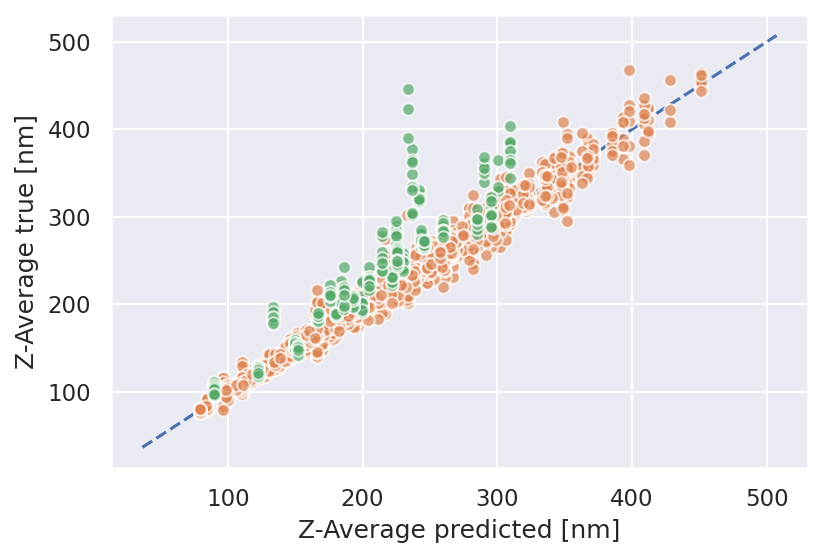

In [123]:
_min = min(true1.min(),true2.min())
_max = max(true1.max(),true2.max())
_min,_max = _min - 0.1*(_max-_min) , _max + 0.1*(_max-_min)
plt.figure(dpi=150)

plt.plot([_min,_max],[_min,_max],"--")

    
plt.plot(pred1,true1,"o",alpha=0.7, markeredgecolor='w')
plt.plot(pred2,true2,"o",alpha=0.7, markeredgecolor='w')
plt.ylabel("Z-Average true [nm]")
plt.xlabel("Z-Average predicted [nm]")
plt.show()
plt.close()

807
0.4


<Figure size 432x288 with 0 Axes>

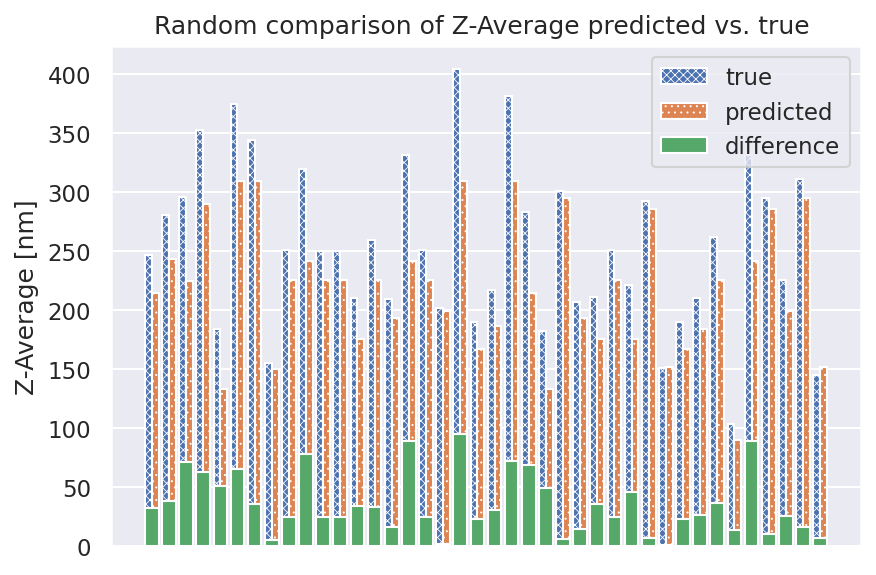

In [124]:
plt.figure()
fig,a = plt.subplots(dpi=150)
idx  = np.arange(len(true2))
seed = np.random.randint(1000)
#seed=458
print(seed)
np.random.seed(seed)
idx=np.random.choice(idx,size=40)
width=0.4
prehw=plt.rcParams['hatch.linewidth']
print(prehw)
plt.rcParams['hatch.linewidth']=0.4
a.bar(np.arange(len(idx)) - width/2,true2[idx],width,label="true", hatch="xxxxxx")
a.bar(np.arange(len(idx)) + width/2,pred2[idx],width,label="predicted", hatch="....")
a.bar(np.arange(len(idx)),np.abs(true2[idx]-pred2[idx]),label="difference")
plt.ylabel("Z-Average [nm]")
plt.title("Random comparison of Z-Average predicted vs. true ")
a.axes.xaxis.set_visible(False)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()
plt.rcParams['hatch.linewidth']=prehw

In [280]:
from sklearn.svm import LinearSVR
sv_study = optuna.create_study()

In [63]:
def support_vector_HPO(trial):
    print(trial.number)
    epsilon =  trial.suggest_uniform('epsilon', 0,2)
    max_iter =  trial.suggest_discrete_uniform('max_iter', 0,10**4,1)

#    n_estimators = trial.suggest_discrete_uniform('n_estimators', 10, 200,1)
#    max_features = trial.suggest_categorical('max_features',  ["auto", "sqrt", "log2", None])
    vm = LinearSVR(epsilon=epsilon,
                   tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None,
                   max_iter=max_iter)
    
    fit = vm.fit(train_features, train_labels)
    # Use the forest's predict method on the test data
    predictions = vm.predict(test_features)# Calculate the absolute errors
    errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
    return np.mean(errors)

sv_study.optimize(support_vector_HPO, n_trials=1)
print(sv_study.best_trial)

eps=[]
ites=[]
#feats={}
for trial in sv_study.trials:
    eps.append(trial.params['epsilon'])
    ites.append(trial.params['max_iter'])
    #if trial.params['max_features'] not in feats:
    #    feats[trial.params['max_features']]=0
    #feats[trial.params['max_features']]+=1
plt.hist(eps,bins=50)
plt.show()
plt.close()
plt.hist(ites,bins=50)
plt.show()
plt.close()
#plt.bar([str(k) for k in feats.keys()],feats.values())
#plt.show()
#plt.close()


vm = LinearSVR(epsilon=sv_study.best_params['epsilon'], tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=int(sv_study.best_params['max_iter']))

fit = vm.fit(train_features, train_labels)
# Use the forest's predict method on the test data
predictions = vm.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print("RMSE",np.sqrt(np.square(errors).mean()))
plt.plot(test_labels,predictions,"o")
plt.plot(train_labels,tree.predict(train_features),"o")

NameError: name 'sv_study' is not defined

In [293]:
10**50/(60*60*24*356)

3.251144402829796e+42

In [291]:
60*60*24*356*10*6

1845504000